<a href="https://colab.research.google.com/github/Monikahutapea/Nasabah-Classification-using-Machine-Learning/blob/main/5027221011_Monika_Damelia_Hutapea_AI_Modul4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Library**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import numpy as np
import xgboost as xgb
import lightgbm as lgb
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, MinMaxScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_selection import RFE
from sklearn.impute import SimpleImputer
from scipy.stats import ttest_ind
from sklearn import preprocessing
from sklearn.svm import SVC

## **Database**

In [ ]:
#Database
df_nasabah = pd.read_csv("./data_nasabah.csv")
df_nasabah

ID_Nasabah  Usia_Nasabah Jenis_Kelamin  Jumlah_Tanggungan  \
0      717574683          53.0     Perempuan                  3   
1      769662033          45.0     Perempuan                  2   
2      719377383          40.0     Laki-Laki                  2   
3      820657083          53.0     Laki-Laki                  4   
4      709836258          45.0     Perempuan                  4   
...          ...           ...           ...                ...   
1045   768390708          47.0     Laki-Laki                  2   
1046   807990108          44.0     Laki-Laki                  1   
1047   711023508          55.0     Perempuan                  1   
1048   826783233          57.0     Perempuan                  3   
1049   713251008          43.0     Perempuan                  2   

       Tingkat_Pendidikan Status_Pernikahan  Pendapatan Kategori_Kartu  \
0                     NaN           Menikah     44280.0           Biru   
1                  Kuliah               NaN      9982.0           Biru   
2                  Kuliah     Belum Menikah     64988.0           Biru   
3                  Kuliah     Belum Menikah    117549.0          Perak   
4                 Sarjana           Menikah     21579.0           Biru   
...                   ...               ...         ...            ...   
1045                  NaN     Belum Menikah     85551.0           Biru   
1046  Tidak Berpendidikan          Bercerai    143802.0           Biru   
1047              Sarjana           Menikah         NaN           Biru   
1048                  SMA     Belum Menikah     25111.0           Biru   
1049  Tidak Berpendidikan           Menikah         NaN           Biru   

      Lama_Menjadi_Nasabah  Jumlah_Layanan  Limit_Kredit  \
0                       46               6        2192.0   
1                       29               2        1438.3   
2                       28               1       10880.0   
3                       48               5       34516.0   
4                       41               5        1927.0   
...                    ...             ...           ...   
1045                    41               6        2877.0   
1046                    39               3       11362.0   
1047                    43               5        3161.0   
1048                    53               1        3029.0   
1049                    38               6        2960.0   

      Saldo_Revolting_Total  Total_Transaksi  Jumlah_Melakukan_Transaksi  \
0                      1146             4756                          85   
1                         0             5025                          85   
2                      2025             4957                          90   
3                       800             3819                          72   
4                      1337             5127                          81   
...                     ...              ...                         ...   
1045                   1136             4006                          68   
1046                      0             3197                          61   
1047                   1389             1547                          30   
1048                   2214             4750                          89   
1049                   1853             3921                          63   

      Rasio_Penggunaan_Rata-rata  
0                          0.523  
1                          0.000  
2                          0.186  
3                          0.023  
4                          0.694  
...                          ...  
1045                       0.395  
1046                       0.000  
1047                       0.439  
1048                       0.731  
1049                       0.626  

[1050 rows x 15 columns]

## **Handle Missing Value**

In [ ]:
# Cek Missing Value Data Nasabah
df_nasabah.isnull().sum()

ID_Nasabah                      0
Usia_Nasabah                   50
Jenis_Kelamin                   0
Jumlah_Tanggungan               0
Tingkat_Pendidikan            167
Status_Pernikahan              74
Pendapatan                    118
Kategori_Kartu                  0
Lama_Menjadi_Nasabah            0
Jumlah_Layanan                  0
Limit_Kredit                    0
Saldo_Revolting_Total           0
Total_Transaksi                 0
Jumlah_Melakukan_Transaksi      0
Rasio_Penggunaan_Rata-rata      0
dtype: int64

In [ ]:
# Handling Missing Value Data Nasabah
columns_to_drop = ["ID_Nasabah"]
categorical_imputer = SimpleImputer(strategy="most_frequent")
categorical_cols = ["Jenis_Kelamin", "Tingkat_Pendidikan", "Status_Pernikahan", "Kategori_Kartu"]
for col in categorical_cols:
    df_nasabah[col] = categorical_imputer.fit_transform(df_nasabah[[col]]).squeeze()

numerical_imputer = SimpleImputer(strategy="mean")
numerical_cols = ["Usia_Nasabah", "Pendapatan"]
for col in numerical_cols:
    df_nasabah[col] = numerical_imputer.fit_transform(df_nasabah[[col]]).squeeze()

# Cek kembali missing value setelah dilakukan handling
print(df_nasabah.isnull().sum())


ID_Nasabah                    0
Usia_Nasabah                  0
Jenis_Kelamin                 0
Jumlah_Tanggungan             0
Tingkat_Pendidikan            0
Status_Pernikahan             0
Pendapatan                    0
Kategori_Kartu                0
Lama_Menjadi_Nasabah          0
Jumlah_Layanan                0
Limit_Kredit                  0
Saldo_Revolting_Total         0
Total_Transaksi               0
Jumlah_Melakukan_Transaksi    0
Rasio_Penggunaan_Rata-rata    0
dtype: int64


In [ ]:
print(df_nasabah.describe())


         ID_Nasabah  Usia_Nasabah  Jumlah_Tanggungan    Pendapatan  \
count  1.050000e+03   1050.000000         1050.00000    1050.00000   
mean   7.407498e+08     46.176000            2.34381   59609.14485   
std    3.804229e+07      7.762995            1.25374   40421.81289   
min    7.081287e+08     26.000000            0.00000     159.00000   
25%    7.135474e+08     41.000000            1.00000   29713.25000   
50%    7.180074e+08     46.176000            2.00000   58308.50000   
75%    7.787832e+08     52.000000            3.00000   76711.25000   
max    8.282361e+08     65.000000            5.00000  199010.00000   

       Lama_Menjadi_Nasabah  Jumlah_Layanan  Limit_Kredit  \
count           1050.000000     1050.000000   1050.000000   
mean              36.097143        3.965714   8367.464762   
std                8.156950        1.543388   8568.071306   
min               13.000000        1.000000   1438.300000   
25%               32.000000        3.000000   2615.500000   
50%

## **Handling Outlier**

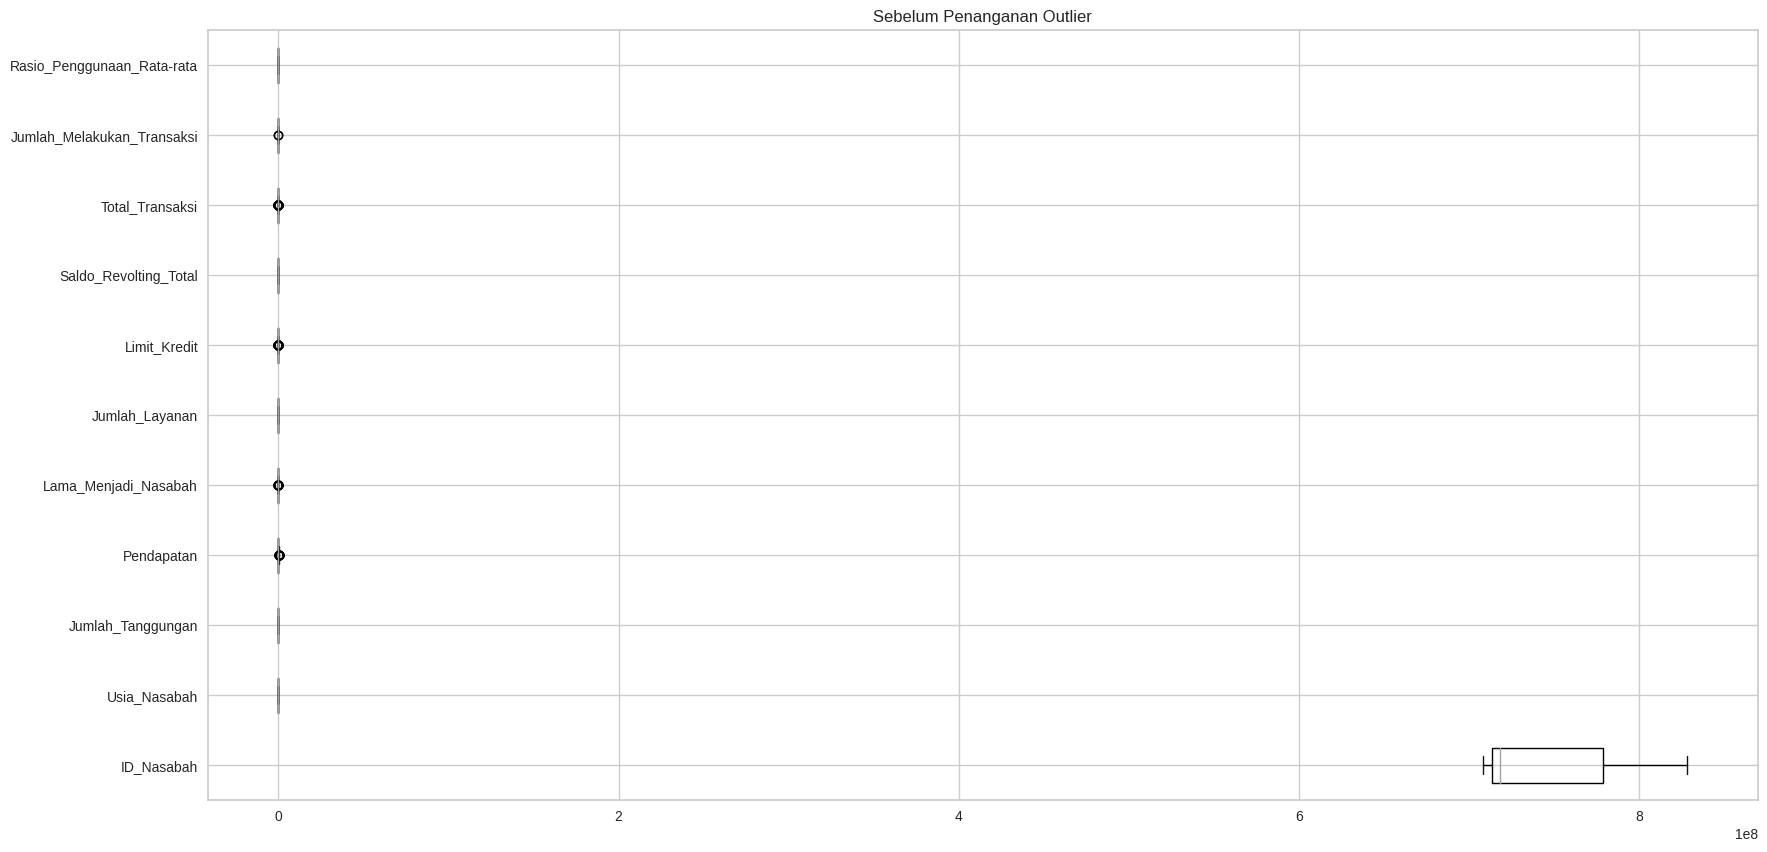

In [ ]:
# Visualisasi sebelum penanganan outlier

plt.figure(figsize=(20, 10))
df_nasabah.boxplot(vert=False)
plt.title('Sebelum Penanganan Outlier')

plt.show()

<Figure size 2000x1000 with 0 Axes>

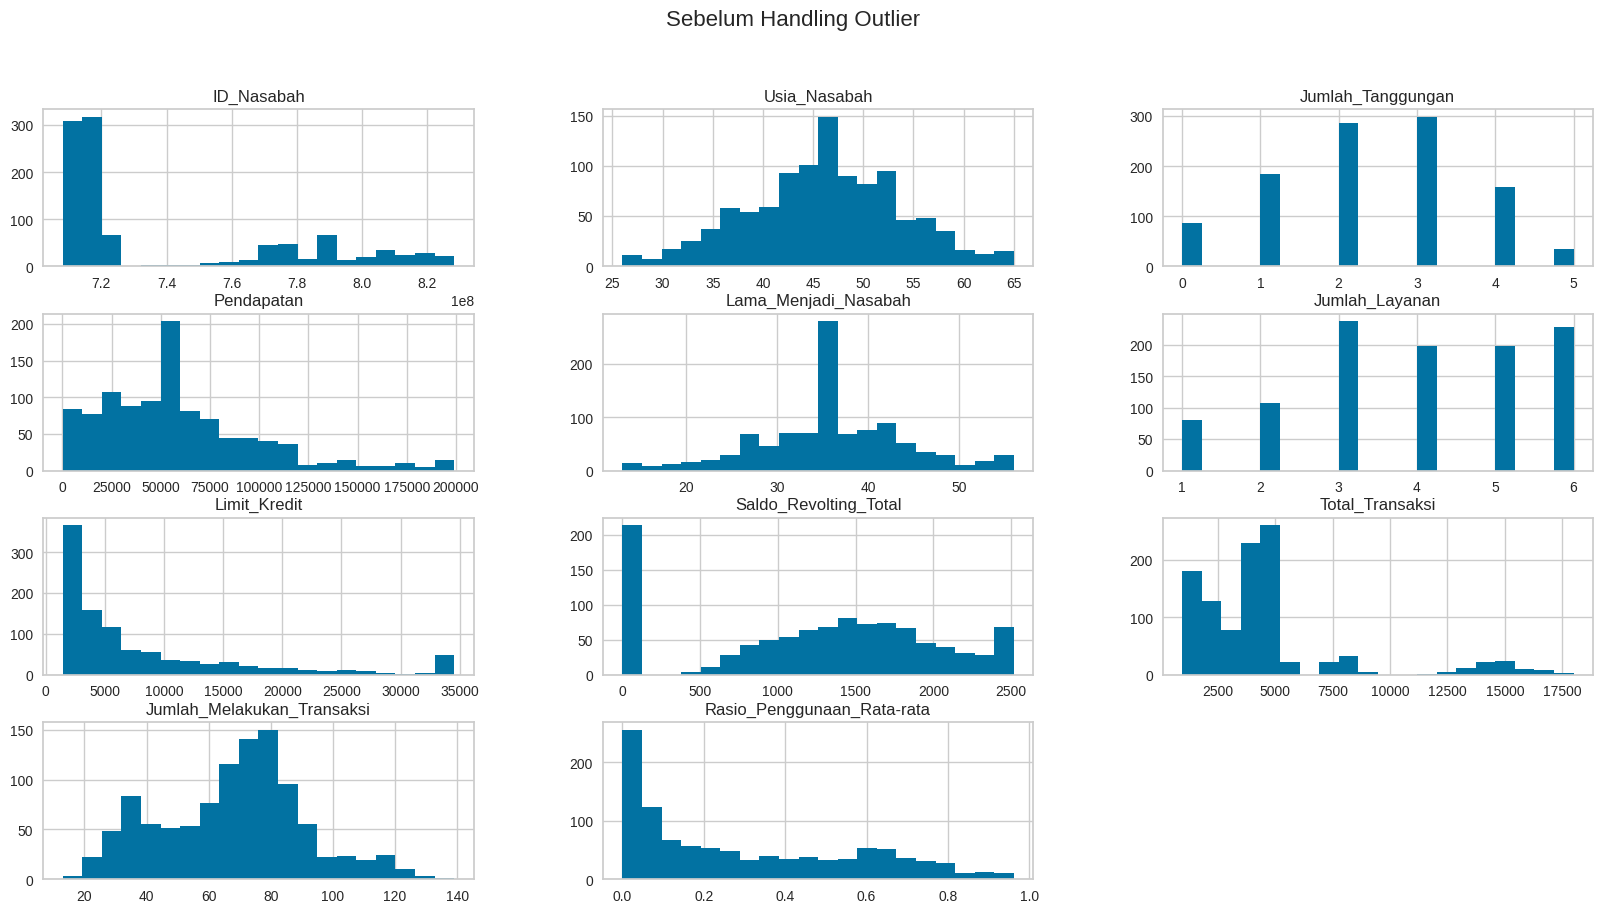

In [ ]:
plt.figure(figsize=(20, 10))
df_nasabah.hist(bins=20, figsize=(20,10))
plt.suptitle('Sebelum Handling Outlier', fontsize=16)
plt.show()

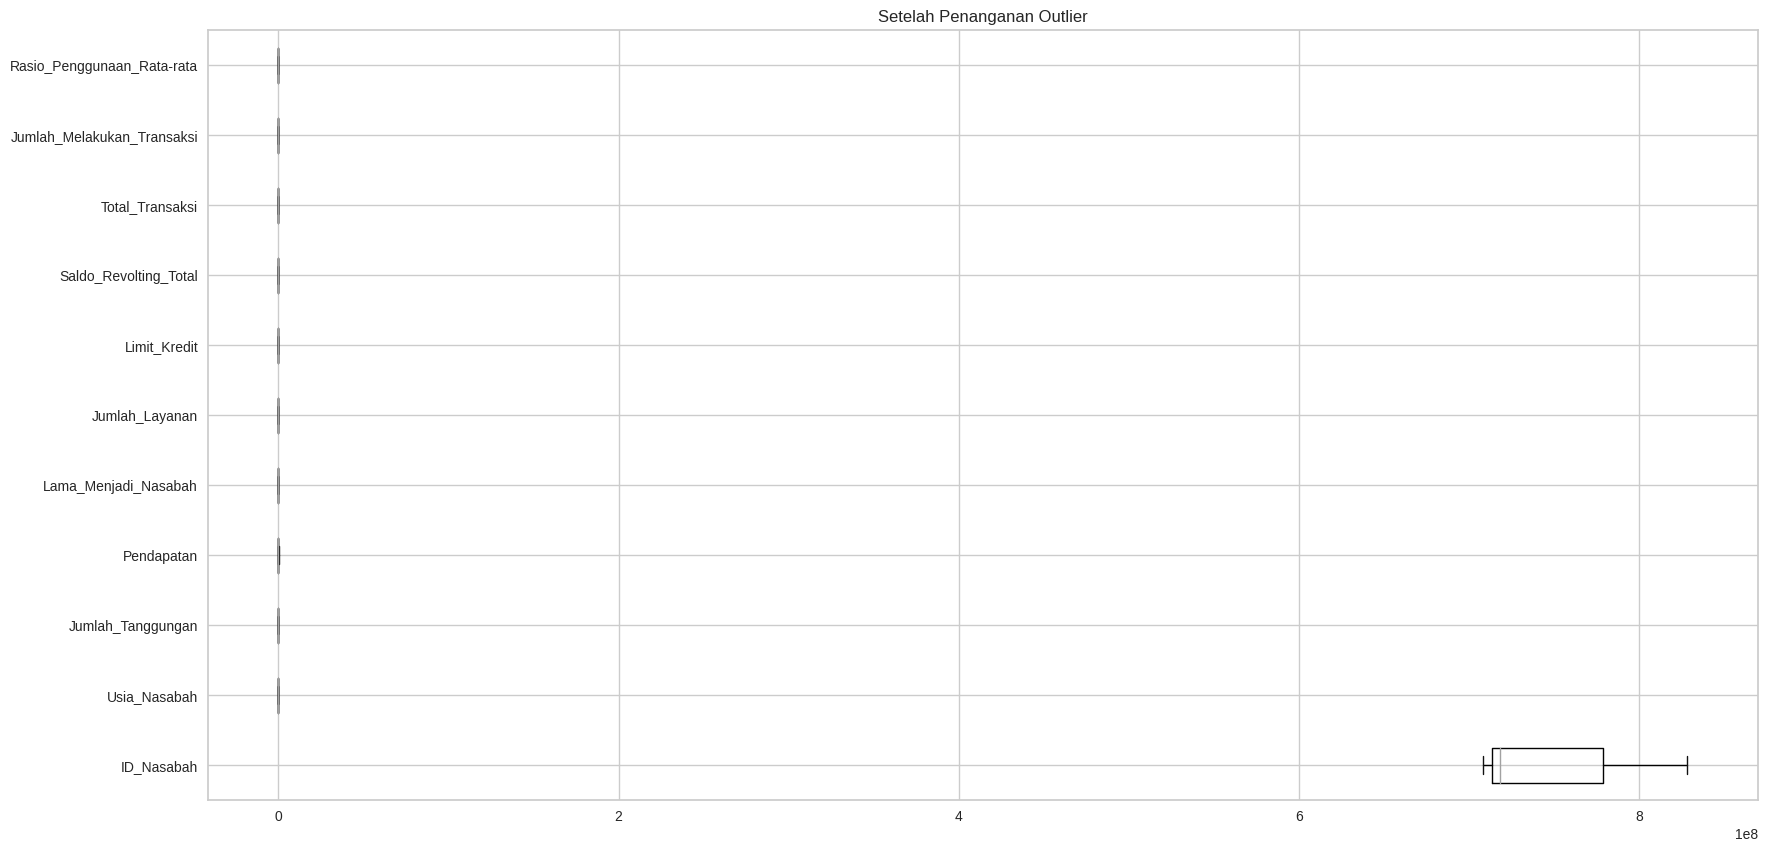

In [ ]:
# Fungsi untuk menangani outlier dengan metode IQR
def handle_outlier_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data[column] = np.where(data[column] < lower_bound, lower_bound, data[column])
    data[column] = np.where(data[column] > upper_bound, upper_bound, data[column])

# Menangani outlier pada kolom yang diinginkan
columns_to_handle = ['Pendapatan', 'Lama_Menjadi_Nasabah', 'Limit_Kredit', 'Total_Transaksi', 'Jumlah_Melakukan_Transaksi']
for column in columns_to_handle:
    handle_outlier_iqr(df_nasabah, column)

# Visualisasi setelah penanganan outlier
plt.figure(figsize=(20, 10))
df_nasabah.boxplot(vert=False)
plt.title('Setelah Penanganan Outlier')
plt.show()

<Figure size 2000x1000 with 0 Axes>

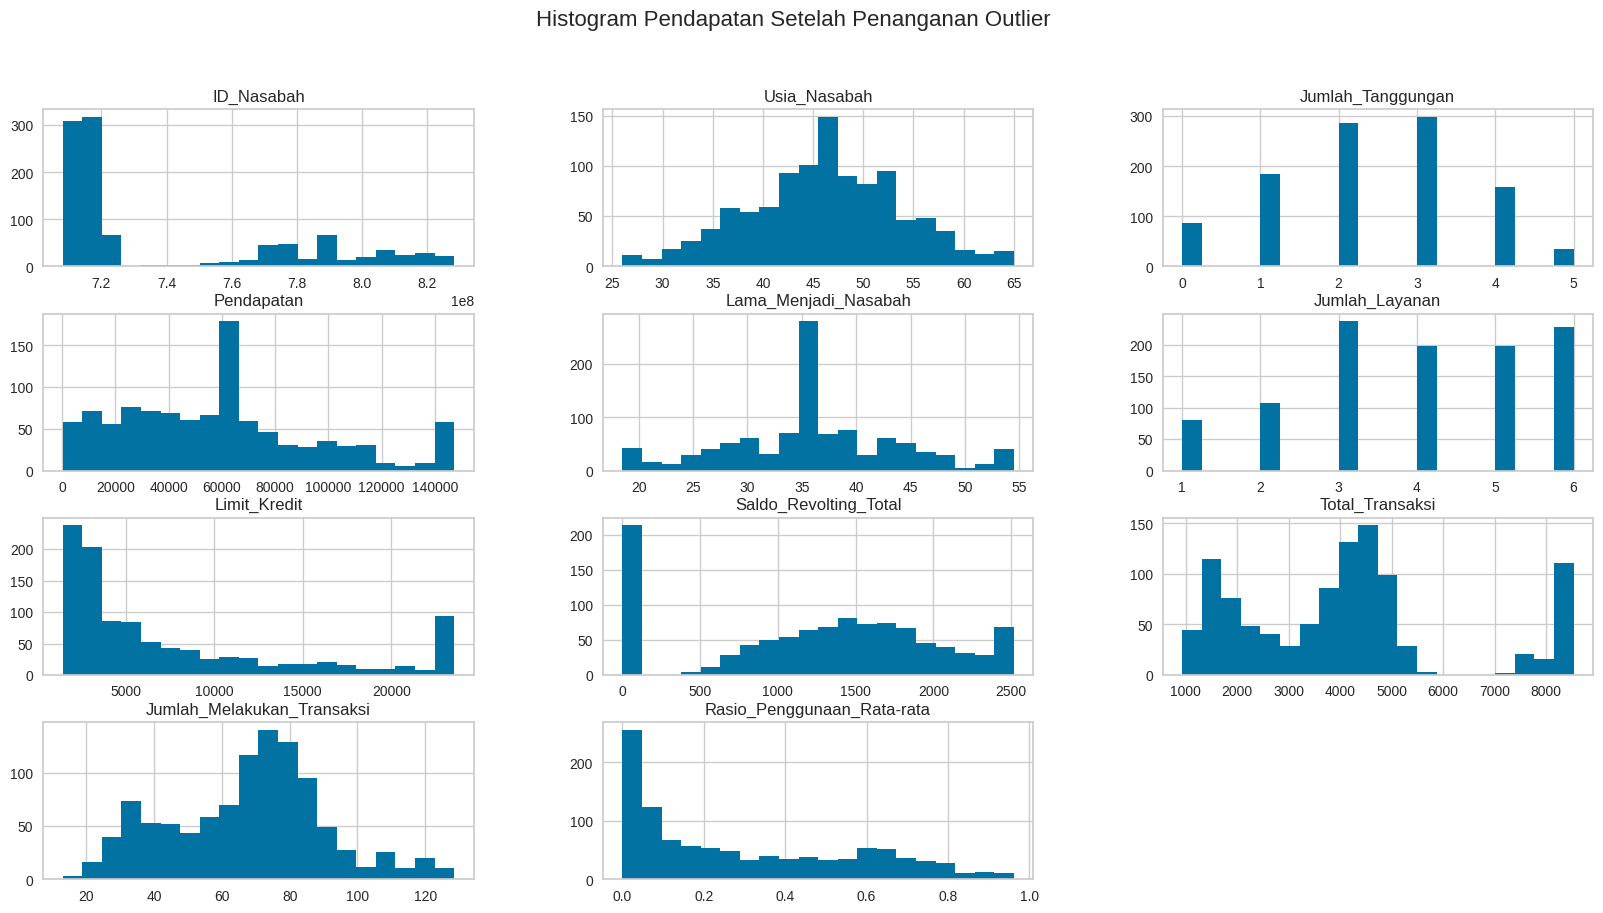

In [ ]:
plt.figure(figsize=(20, 10))
df_nasabah.hist(bins=20, figsize=(20,10))
plt.suptitle('Histogram Pendapatan Setelah Penanganan Outlier', fontsize=16)
plt.show()

## **Visualisasi**


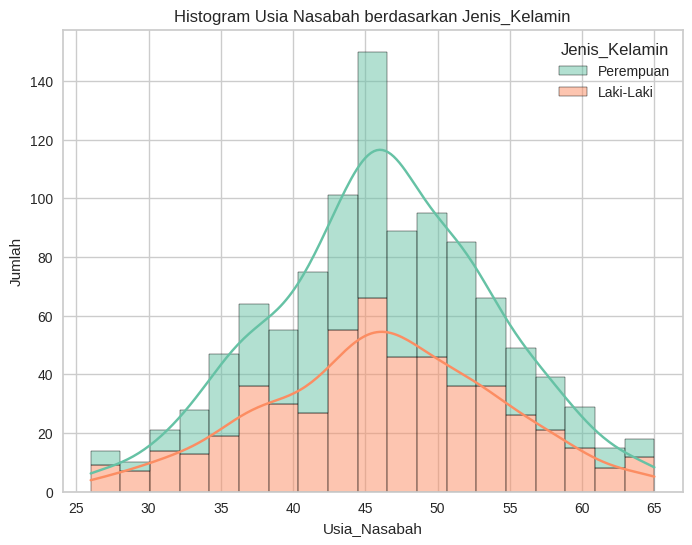

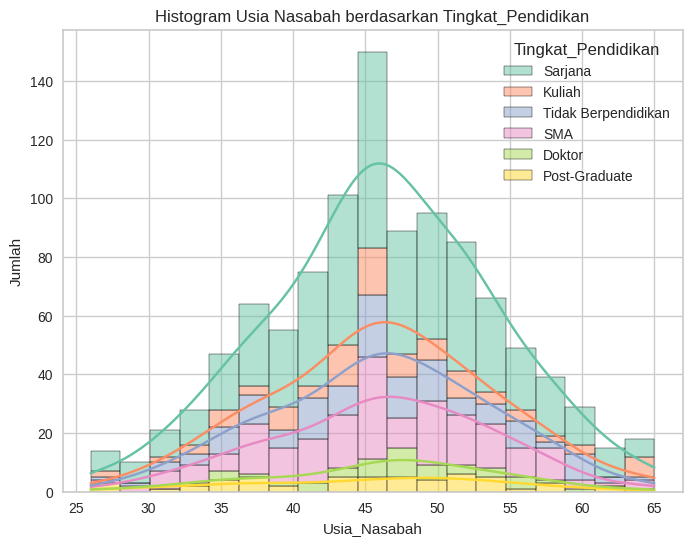

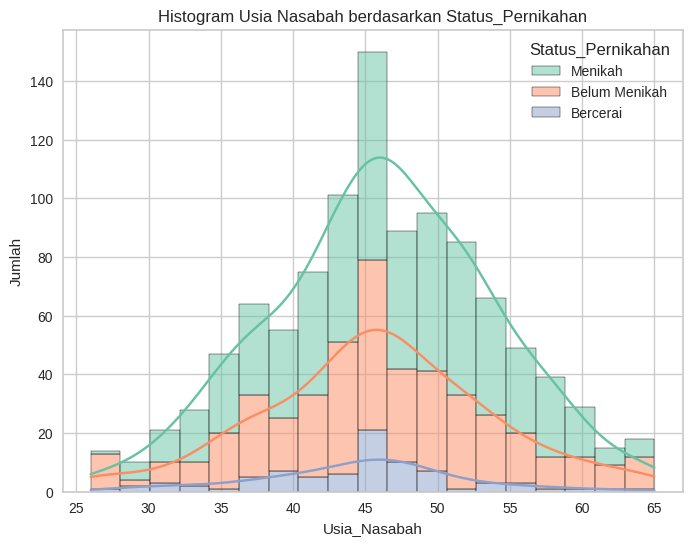

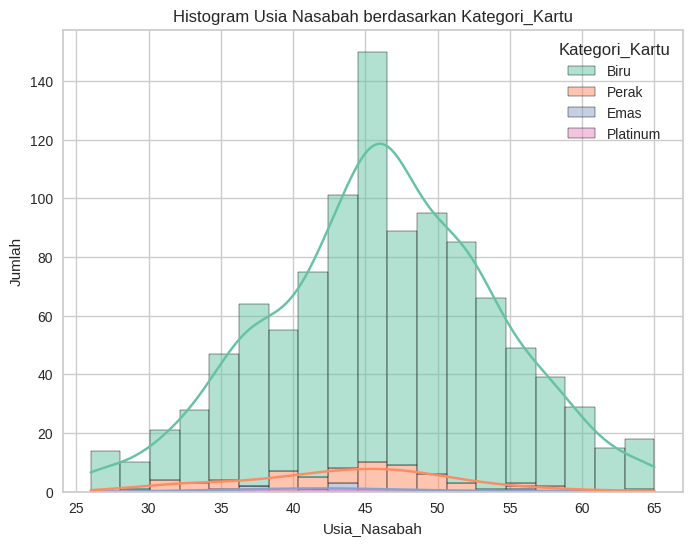

In [ ]:
def plot_histogram_for_target(df, target_col):
    plt.figure(figsize=(8, 6))

    # Gambar histogram untuk kolom target yang dipilih
    sns.histplot(data=df, x='Usia_Nasabah', hue=target_col, multiple='stack', palette='Set2', kde=True)

    # Tambahkan judul
    plt.title(f'Histogram Usia Nasabah berdasarkan {target_col}')

    # Ganti label sumbu y menjadi "Jumlah"
    plt.ylabel("Jumlah")

    # Tampilkan plot
    plt.show()

# Daftar kolom target kategorikal
target_cols = ["Jenis_Kelamin", "Tingkat_Pendidikan", "Status_Pernikahan", "Kategori_Kartu"]

# Loop melalui setiap kolom target dan gambar histogram
for target_col_to_plot in target_cols:
    plot_histogram_for_target(df_nasabah, target_col_to_plot)


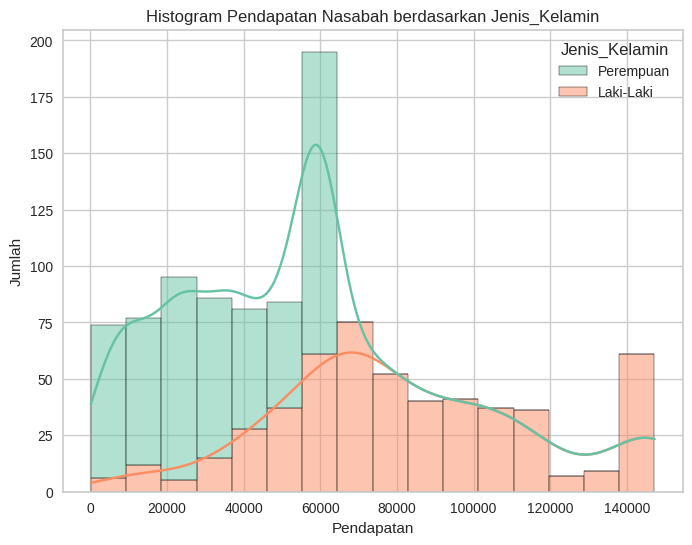

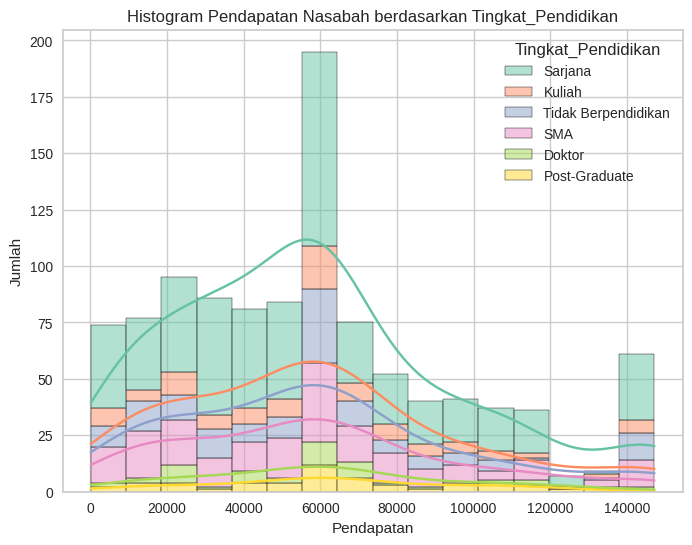

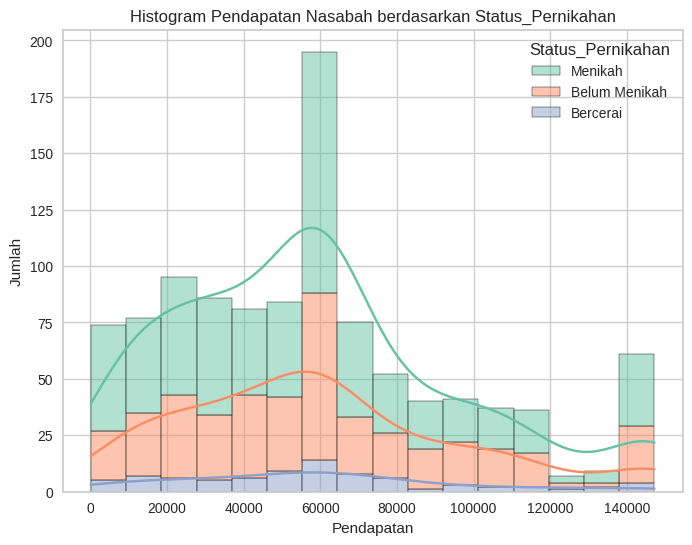

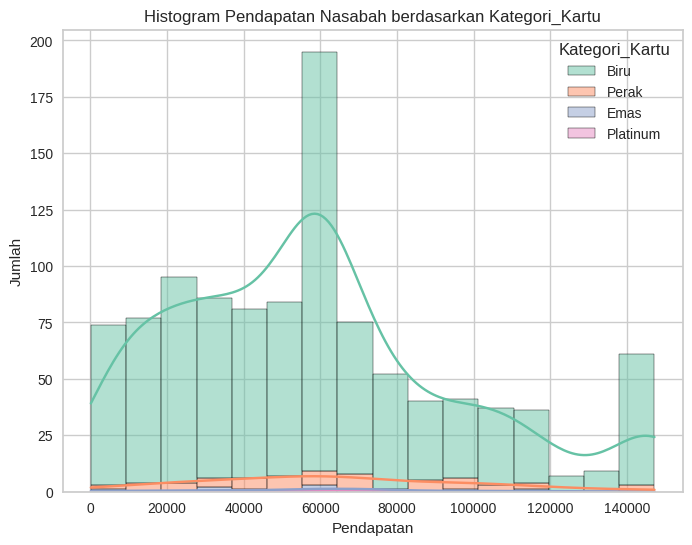

In [ ]:
def plot_histogram_for_target(df, target_col):
    plt.figure(figsize=(8, 6))

    # Gambar histogram untuk kolom target yang dipilih
    sns.histplot(data=df, x='Pendapatan', hue=target_col, multiple='stack', palette='Set2', kde=True)

    # Tambahkan judul
    plt.title(f'Histogram Pendapatan Nasabah berdasarkan {target_col}')

    # Ganti label sumbu y menjadi "Jumlah"
    plt.ylabel("Jumlah")

    # Tampilkan plot
    plt.show()

# Daftar kolom target kategorikal
target_cols = ["Jenis_Kelamin", "Tingkat_Pendidikan", "Status_Pernikahan", "Kategori_Kartu"]

# Loop melalui setiap kolom target dan gambar histogram
for target_col_to_plot in target_cols:
    plot_histogram_for_target(df_nasabah, target_col_to_plot)


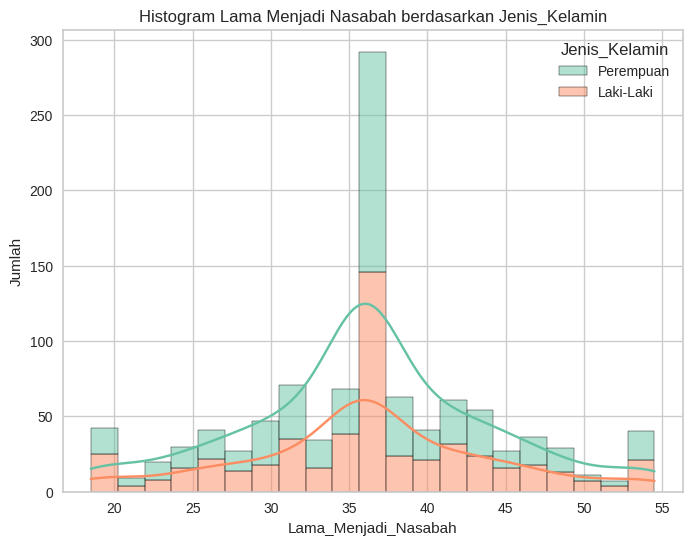

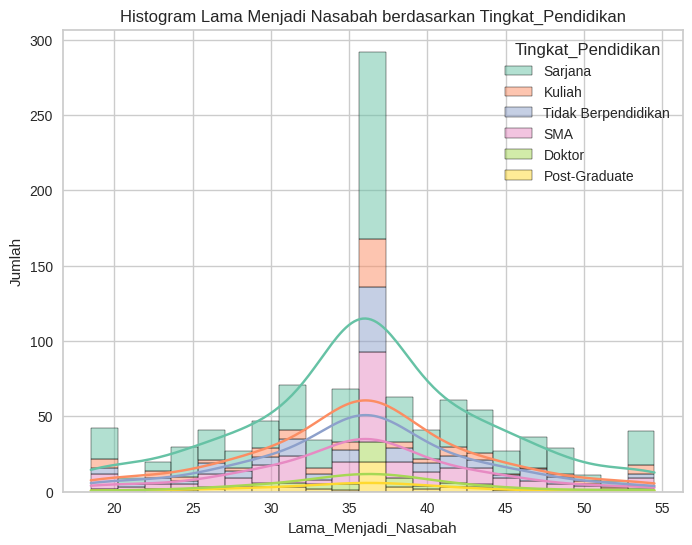

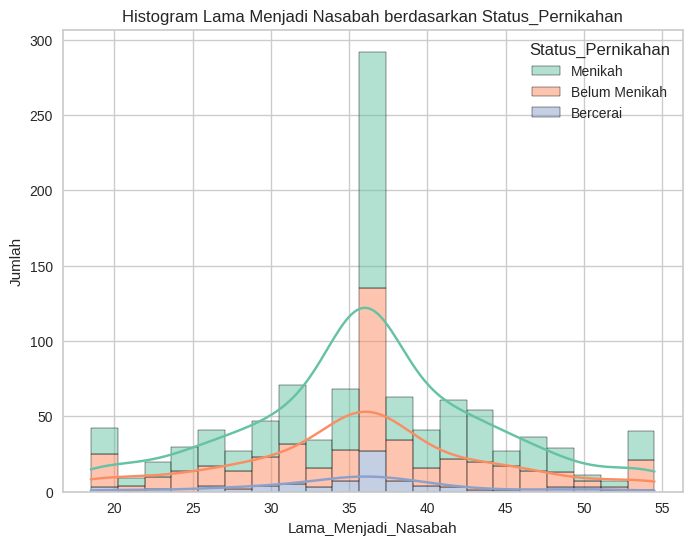

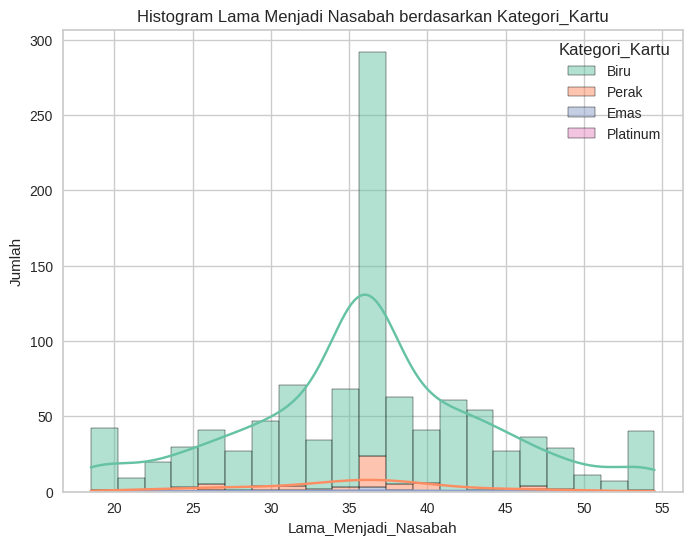

In [ ]:
def plot_histogram_for_target(df, target_col):
    plt.figure(figsize=(8, 6))

    # Gambar histogram untuk kolom target yang dipilih
    sns.histplot(data=df, x='Lama_Menjadi_Nasabah', hue=target_col, multiple='stack', palette='Set2', kde=True)

    # Tambahkan judul
    plt.title(f'Histogram Lama Menjadi Nasabah berdasarkan {target_col}')

    # Ganti label sumbu y menjadi "Jumlah"
    plt.ylabel("Jumlah")

    # Tampilkan plot
    plt.show()

# Daftar kolom target kategorikal
target_cols = ["Jenis_Kelamin", "Tingkat_Pendidikan", "Status_Pernikahan", "Kategori_Kartu"]

# Loop melalui setiap kolom target dan gambar histogram
for target_col_to_plot in target_cols:
    plot_histogram_for_target(df_nasabah, target_col_to_plot)


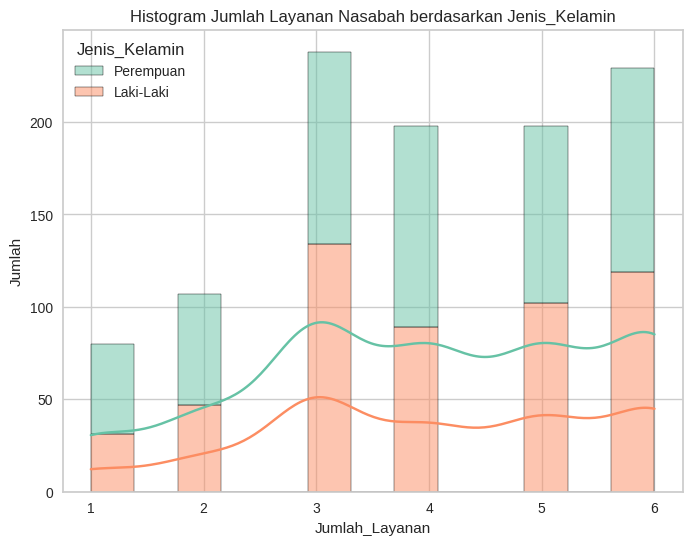

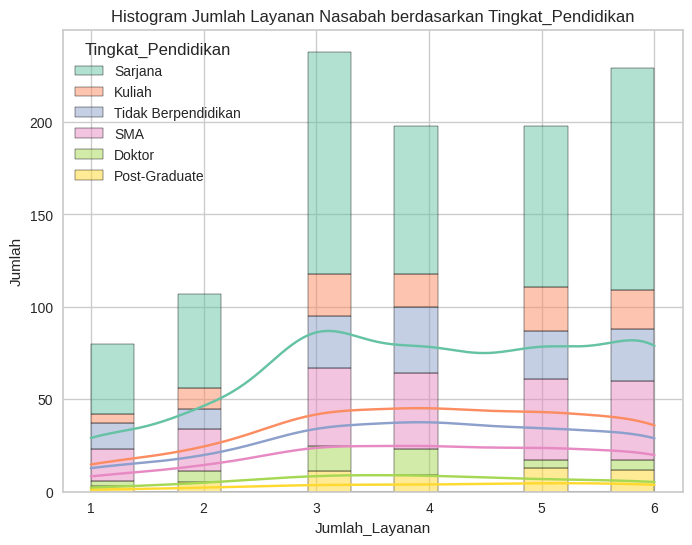

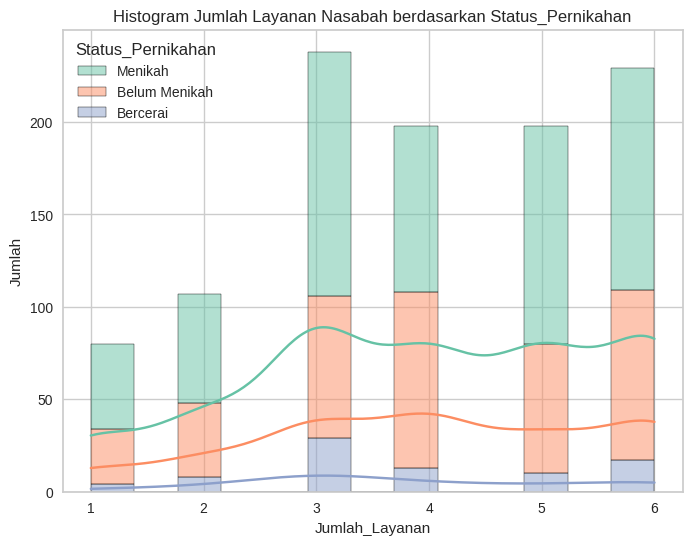

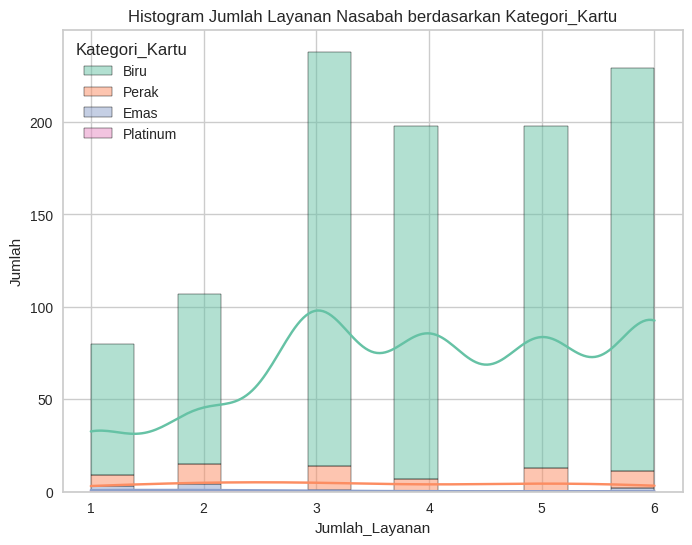

In [ ]:
def plot_histogram_for_target(df, target_col):
    plt.figure(figsize=(8, 6))

    # Gambar histogram untuk kolom target yang dipilih
    sns.histplot(data=df, x='Jumlah_Layanan', hue=target_col, multiple='stack', palette='Set2', kde=True)

    # Tambahkan judul
    plt.title(f'Histogram Jumlah Layanan Nasabah berdasarkan {target_col}')

    # Ganti label sumbu y menjadi "Jumlah"
    plt.ylabel("Jumlah")

    # Tampilkan plot
    plt.show()

# Daftar kolom target kategorikal
target_cols = ["Jenis_Kelamin", "Tingkat_Pendidikan", "Status_Pernikahan", "Kategori_Kartu"]

# Loop melalui setiap kolom target dan gambar histogram
for target_col_to_plot in target_cols:
    plot_histogram_for_target(df_nasabah, target_col_to_plot)


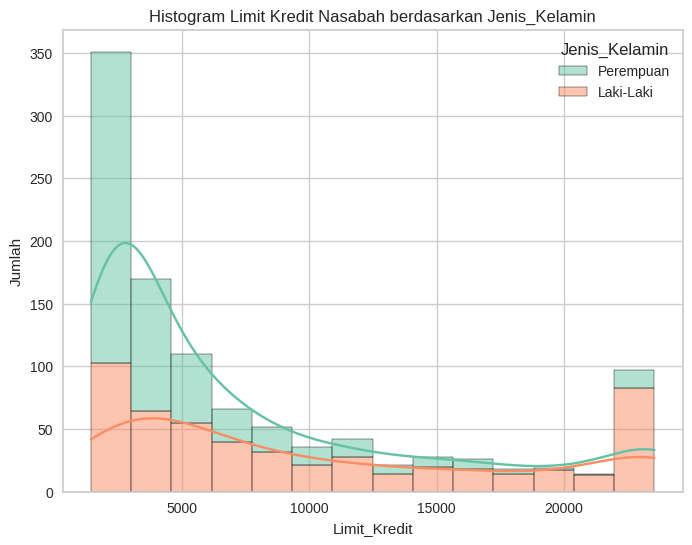

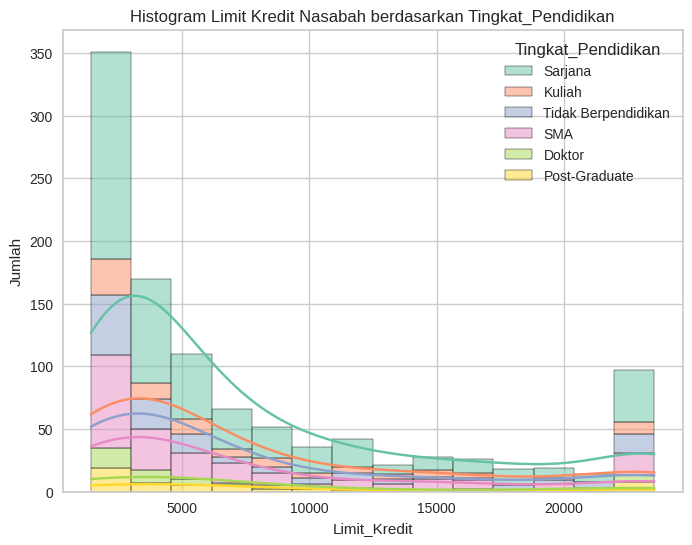

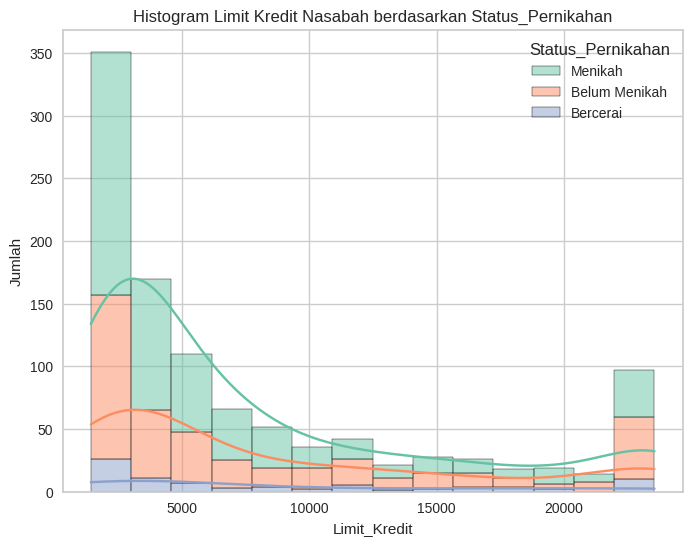

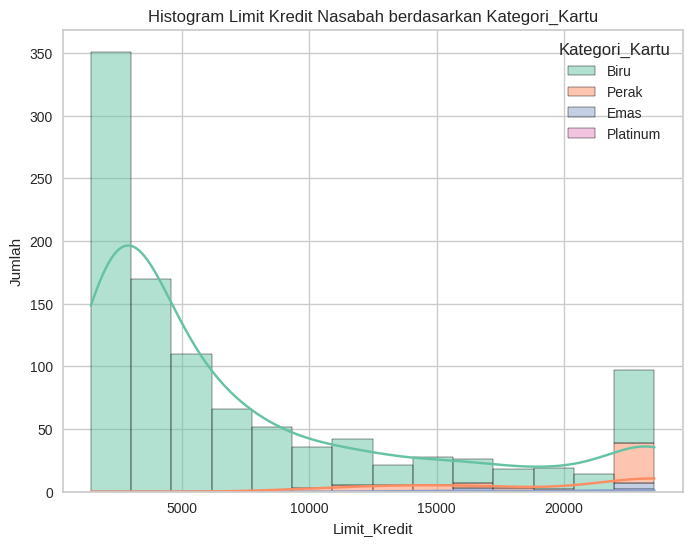

In [ ]:
def plot_histogram_for_target(df, target_col):
    plt.figure(figsize=(8, 6))

    # Gambar histogram untuk kolom target yang dipilih
    sns.histplot(data=df, x='Limit_Kredit', hue=target_col, multiple='stack', palette='Set2', kde=True)

    # Tambahkan judul
    plt.title(f'Histogram Limit Kredit Nasabah berdasarkan {target_col}')

    # Ganti label sumbu y menjadi "Jumlah"
    plt.ylabel("Jumlah")

    # Tampilkan plot
    plt.show()

# Daftar kolom target kategorikal
target_cols = ["Jenis_Kelamin", "Tingkat_Pendidikan", "Status_Pernikahan", "Kategori_Kartu"]

# Loop melalui setiap kolom target dan gambar histogram
for target_col_to_plot in target_cols:
    plot_histogram_for_target(df_nasabah, target_col_to_plot)


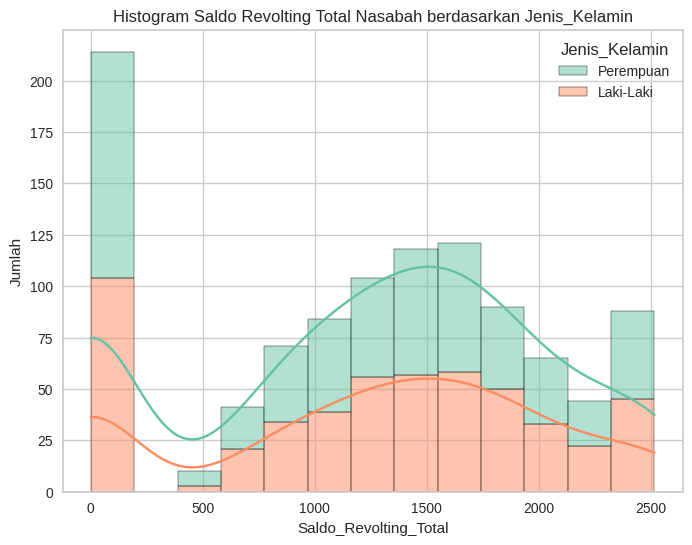

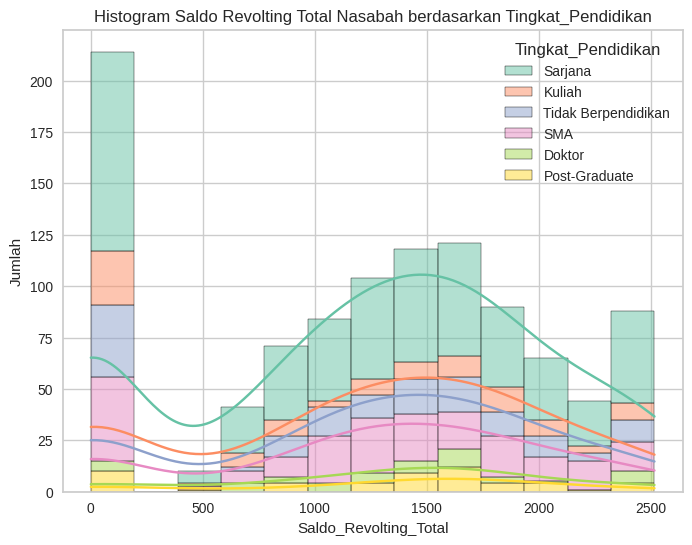

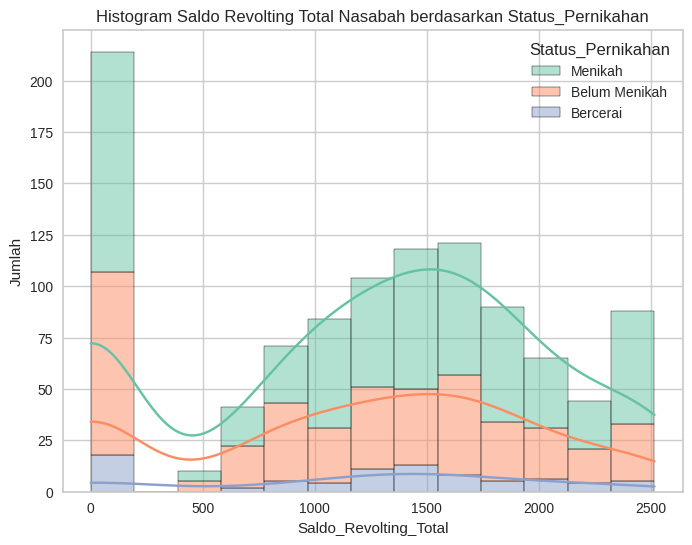

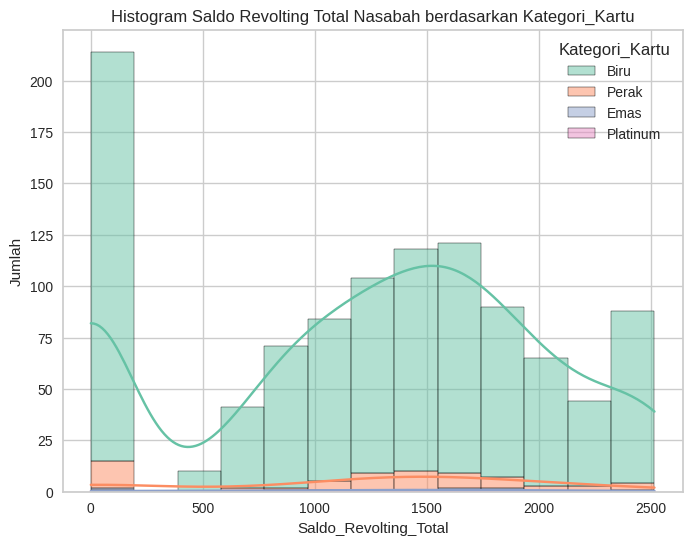

In [ ]:
def plot_histogram_for_target(df, target_col):
    plt.figure(figsize=(8, 6))

    # Gambar histogram untuk kolom target yang dipilih
    sns.histplot(data=df, x='Saldo_Revolting_Total', hue=target_col, multiple='stack', palette='Set2', kde=True)

    # Tambahkan judul
    plt.title(f'Histogram Saldo Revolting Total Nasabah berdasarkan {target_col}')

    # Ganti label sumbu y menjadi "Jumlah"
    plt.ylabel("Jumlah")

    # Tampilkan plot
    plt.show()

# Daftar kolom target kategorikal
target_cols = ["Jenis_Kelamin", "Tingkat_Pendidikan", "Status_Pernikahan", "Kategori_Kartu"]

# Loop melalui setiap kolom target dan gambar histogram
for target_col_to_plot in target_cols:
    plot_histogram_for_target(df_nasabah, target_col_to_plot)


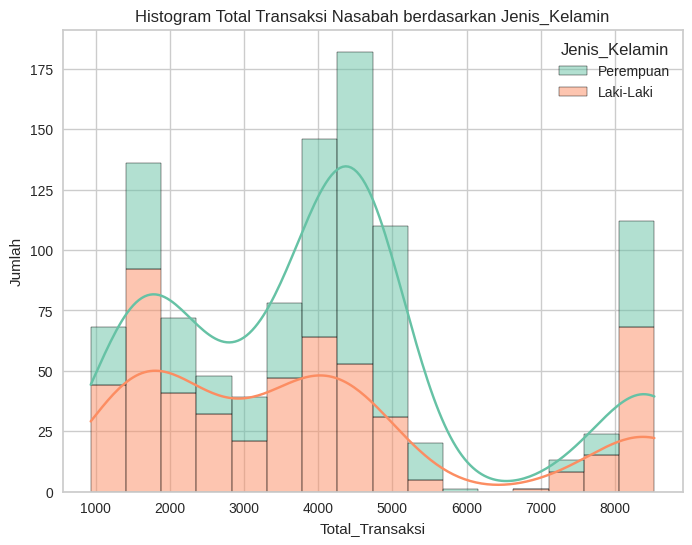

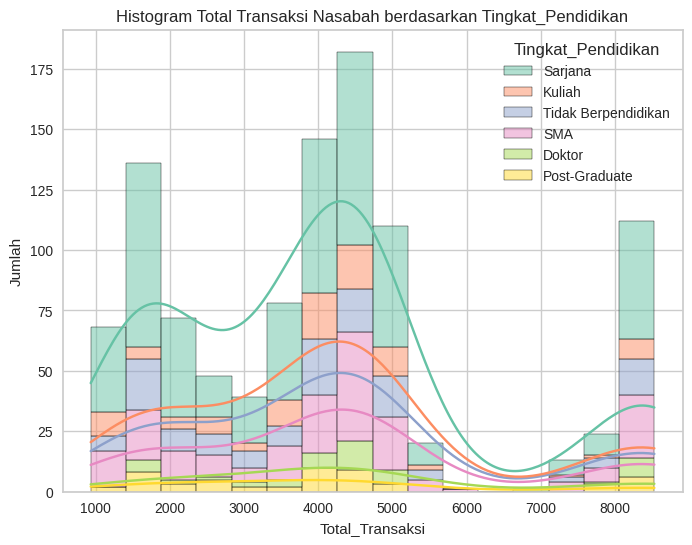

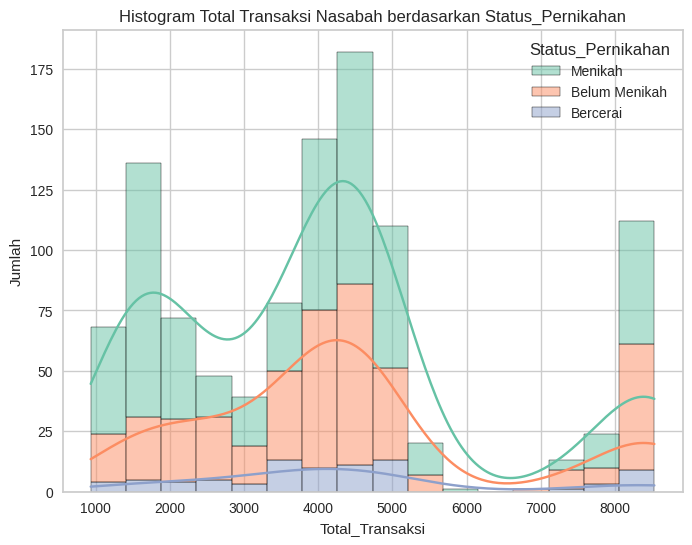

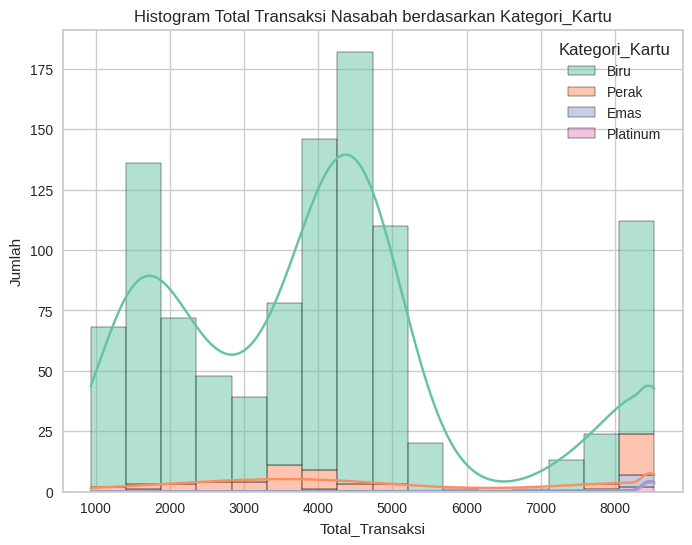

In [ ]:
def plot_histogram_for_target(df, target_col):
    plt.figure(figsize=(8, 6))

    # Gambar histogram untuk kolom target yang dipilih
    sns.histplot(data=df, x='Total_Transaksi', hue=target_col, multiple='stack', palette='Set2', kde=True)

    # Tambahkan judul
    plt.title(f'Histogram Total Transaksi Nasabah berdasarkan {target_col}')

    # Ganti label sumbu y menjadi "Jumlah"
    plt.ylabel("Jumlah")

    # Tampilkan plot
    plt.show()

# Daftar kolom target kategorikal
target_cols = ["Jenis_Kelamin", "Tingkat_Pendidikan", "Status_Pernikahan", "Kategori_Kartu"]

# Loop melalui setiap kolom target dan gambar histogram
for target_col_to_plot in target_cols:
    plot_histogram_for_target(df_nasabah, target_col_to_plot)


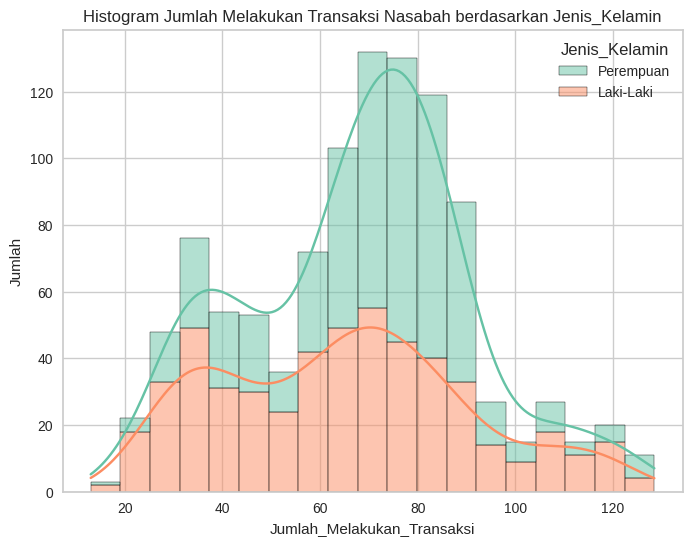

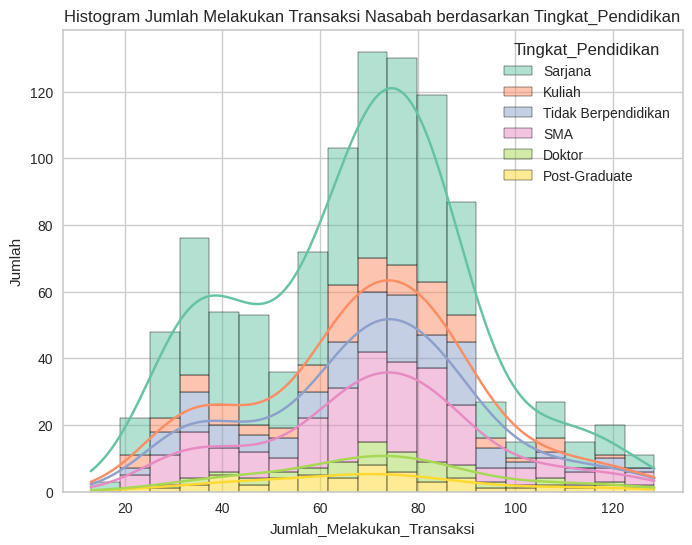

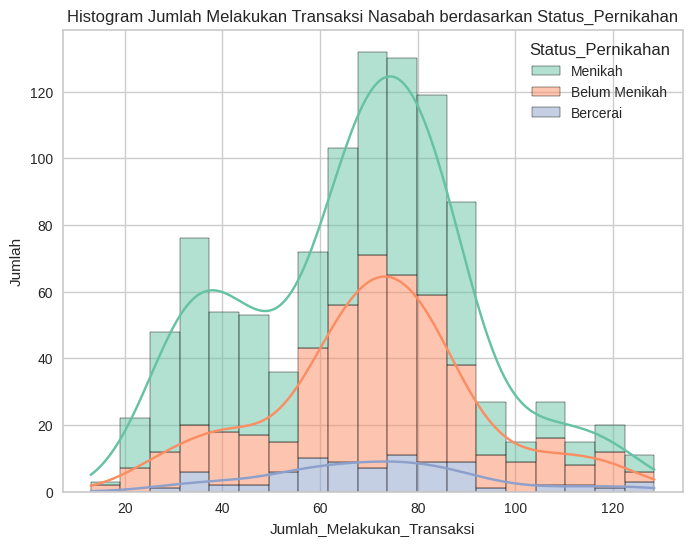

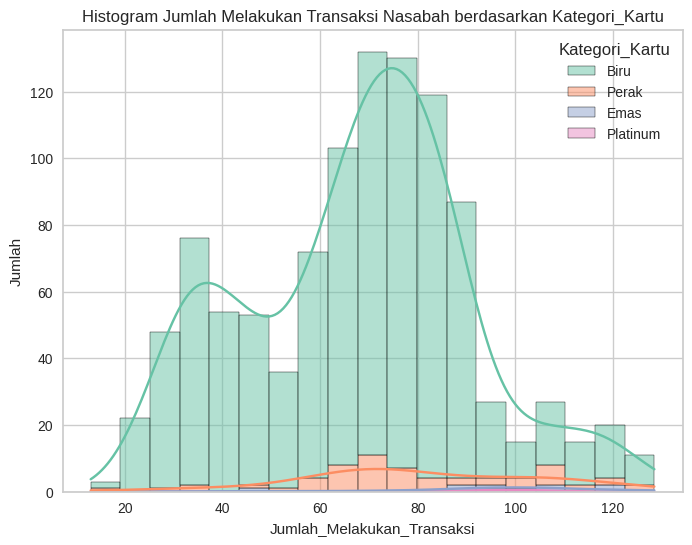

In [ ]:
def plot_histogram_for_target(df, target_col):
    plt.figure(figsize=(8, 6))

    # Gambar histogram untuk kolom target yang dipilih
    sns.histplot(data=df, x='Jumlah_Melakukan_Transaksi', hue=target_col, multiple='stack', palette='Set2', kde=True)

    # Tambahkan judul
    plt.title(f'Histogram Jumlah Melakukan Transaksi Nasabah berdasarkan {target_col}')

    # Ganti label sumbu y menjadi "Jumlah"
    plt.ylabel("Jumlah")

    # Tampilkan plot
    plt.show()

# Daftar kolom target kategorikal
target_cols = ["Jenis_Kelamin", "Tingkat_Pendidikan", "Status_Pernikahan", "Kategori_Kartu"]

# Loop melalui setiap kolom target dan gambar histogram
for target_col_to_plot in target_cols:
    plot_histogram_for_target(df_nasabah, target_col_to_plot)


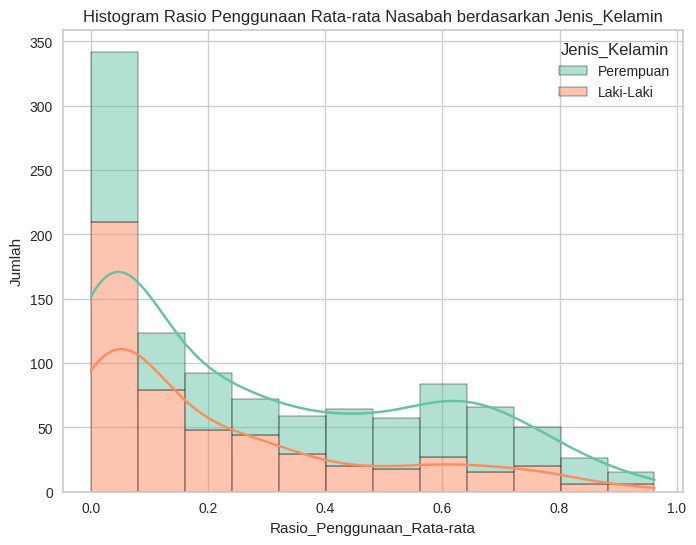

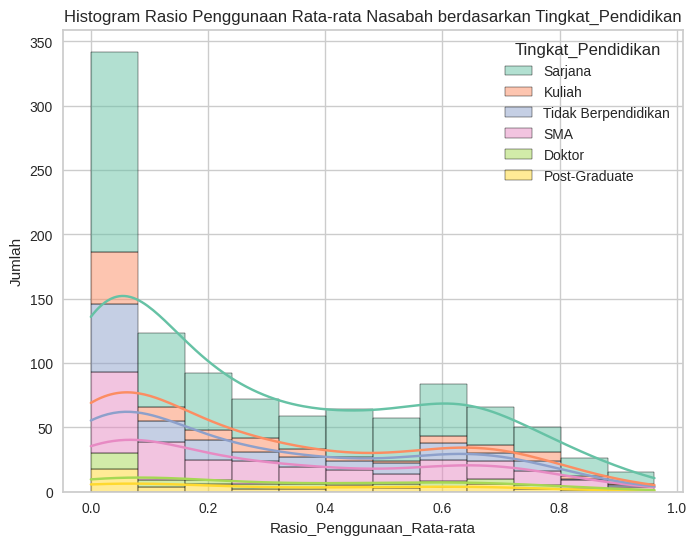

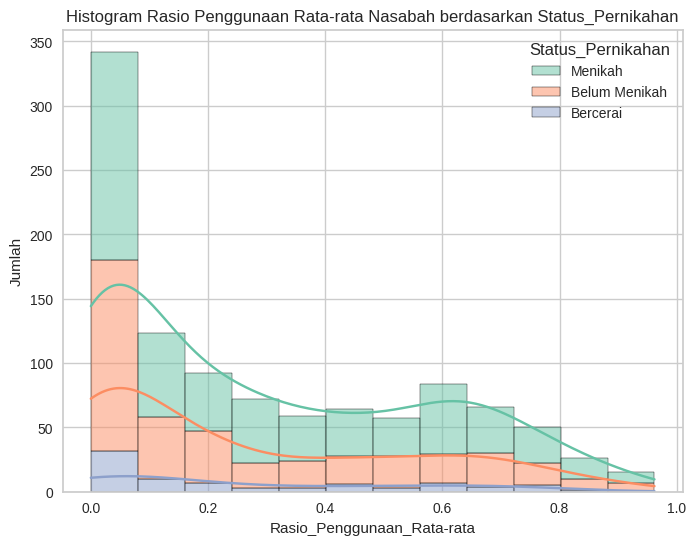

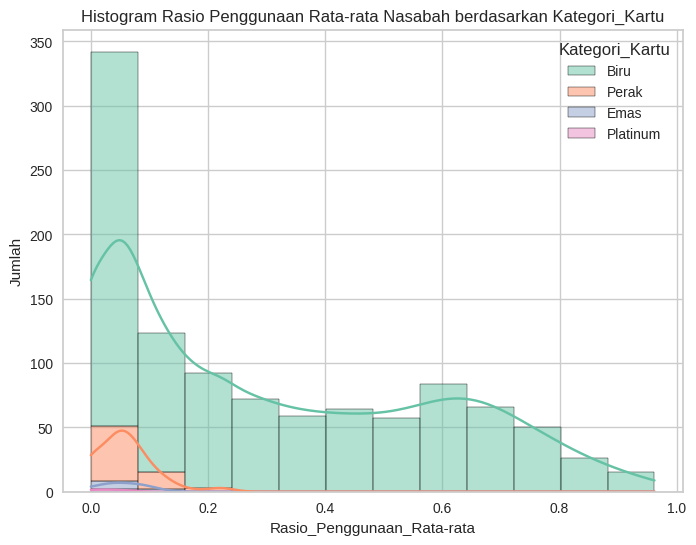

In [ ]:
def plot_histogram_for_target(df, target_col):
    plt.figure(figsize=(8, 6))

    # Gambar histogram untuk kolom target yang dipilih
    sns.histplot(data=df, x='Rasio_Penggunaan_Rata-rata', hue=target_col, multiple='stack', palette='Set2', kde=True)

    # Tambahkan judul
    plt.title(f'Histogram Rasio Penggunaan Rata-rata Nasabah berdasarkan {target_col}')
    # Ganti label sumbu y menjadi "Jumlah"
    plt.ylabel("Jumlah")

    # Tampilkan plot
    plt.show()

# Daftar kolom target kategorikal
target_cols = ["Jenis_Kelamin", "Tingkat_Pendidikan", "Status_Pernikahan", "Kategori_Kartu"]

# Loop melalui setiap kolom target dan gambar histogram
for target_col_to_plot in target_cols:
    plot_histogram_for_target(df_nasabah, target_col_to_plot)


## **Normalisasi**



In [ ]:
# Inisialisasi MinMaxScaler
scaler = MinMaxScaler()

# Terapkan normalisasi pada data
df_nasabah[numerical_cols] = scaler.fit_transform(df_nasabah[numerical_cols])

df_nasabah

ID_Nasabah  Usia_Nasabah Jenis_Kelamin  Jumlah_Tanggungan  \
0      717574683      0.692308     Perempuan                  3   
1      769662033      0.487179     Perempuan                  2   
2      719377383      0.358974     Laki-Laki                  2   
3      820657083      0.692308     Laki-Laki                  4   
4      709836258      0.487179     Perempuan                  4   
...          ...           ...           ...                ...   
1045   768390708      0.538462     Laki-Laki                  2   
1046   807990108      0.461538     Laki-Laki                  1   
1047   711023508      0.743590     Perempuan                  1   
1048   826783233      0.794872     Perempuan                  3   
1049   713251008      0.435897     Perempuan                  2   

       Tingkat_Pendidikan Status_Pernikahan  Pendapatan Kategori_Kartu  \
0                 Sarjana           Menikah    0.300042           Biru   
1                  Kuliah           Menikah    0.066801           Biru   
2                  Kuliah     Belum Menikah    0.440866           Biru   
3                  Kuliah     Belum Menikah    0.798304          Perak   
4                 Sarjana           Menikah    0.145665           Biru   
...                   ...               ...         ...            ...   
1045              Sarjana     Belum Menikah    0.580703           Biru   
1046  Tidak Berpendidikan          Bercerai    0.976836           Biru   
1047              Sarjana           Menikah    0.404287           Biru   
1048                  SMA     Belum Menikah    0.169685           Biru   
1049  Tidak Berpendidikan           Menikah    0.404287           Biru   

      Lama_Menjadi_Nasabah  Jumlah_Layanan  Limit_Kredit  \
0                     46.0               6        2192.0   
1                     29.0               2        1438.3   
2                     28.0               1       10880.0   
3                     48.0               5       23543.0   
4                     41.0               5        1927.0   
...                    ...             ...           ...   
1045                  41.0               6        2877.0   
1046                  39.0               3       11362.0   
1047                  43.0               5        3161.0   
1048                  53.0               1        3029.0   
1049                  38.0               6        2960.0   

      Saldo_Revolting_Total  Total_Transaksi  Jumlah_Melakukan_Transaksi  \
0                      1146           4756.0                        85.0   
1                         0           5025.0                        85.0   
2                      2025           4957.0                        90.0   
3                       800           3819.0                        72.0   
4                      1337           5127.0                        81.0   
...                     ...              ...                         ...   
1045                   1136           4006.0                        68.0   
1046                      0           3197.0                        61.0   
1047                   1389           1547.0                        30.0   
1048                   2214           4750.0                        89.0   
1049                   1853           3921.0                        63.0   

      Rasio_Penggunaan_Rata-rata  
0                          0.523  
1                          0.000  
2                          0.186  
3                          0.023  
4                          0.694  
...                          ...  
1045                       0.395  
1046                       0.000  
1047                       0.439  
1048                       0.731  
1049                       0.626  

[1050 rows x 15 columns]

## **Encoder**

In [ ]:
# Membuat objek LabelEncoder
label_encoder = LabelEncoder()

# Iterasi melalui kolom-kolom kategorikal
for col in categorical_cols:
    # Menerapkan label encoding dan mengganti nilai dalam DataFrame
    df_nasabah[col] = label_encoder.fit_transform(df_nasabah[col])

df_nasabah

ID_Nasabah  Usia_Nasabah  Jenis_Kelamin  Jumlah_Tanggungan  \
0      717574683      0.692308              1                  3   
1      769662033      0.487179              1                  2   
2      719377383      0.358974              0                  2   
3      820657083      0.692308              0                  4   
4      709836258      0.487179              1                  4   
...          ...           ...            ...                ...   
1045   768390708      0.538462              0                  2   
1046   807990108      0.461538              0                  1   
1047   711023508      0.743590              1                  1   
1048   826783233      0.794872              1                  3   
1049   713251008      0.435897              1                  2   

      Tingkat_Pendidikan  Status_Pernikahan  Pendapatan  Kategori_Kartu  \
0                      4                  2    0.300042               0   
1                      1                  2    0.066801               0   
2                      1                  0    0.440866               0   
3                      1                  0    0.798304               2   
4                      4                  2    0.145665               0   
...                  ...                ...         ...             ...   
1045                   4                  0    0.580703               0   
1046                   5                  1    0.976836               0   
1047                   4                  2    0.404287               0   
1048                   3                  0    0.169685               0   
1049                   5                  2    0.404287               0   

      Lama_Menjadi_Nasabah  Jumlah_Layanan  Limit_Kredit  \
0                     46.0               6        2192.0   
1                     29.0               2        1438.3   
2                     28.0               1       10880.0   
3                     48.0               5       23543.0   
4                     41.0               5        1927.0   
...                    ...             ...           ...   
1045                  41.0               6        2877.0   
1046                  39.0               3       11362.0   
1047                  43.0               5        3161.0   
1048                  53.0               1        3029.0   
1049                  38.0               6        2960.0   

      Saldo_Revolting_Total  Total_Transaksi  Jumlah_Melakukan_Transaksi  \
0                      1146           4756.0                        85.0   
1                         0           5025.0                        85.0   
2                      2025           4957.0                        90.0   
3                       800           3819.0                        72.0   
4                      1337           5127.0                        81.0   
...                     ...              ...                         ...   
1045                   1136           4006.0                        68.0   
1046                      0           3197.0                        61.0   
1047                   1389           1547.0                        30.0   
1048                   2214           4750.0                        89.0   
1049                   1853           3921.0                        63.0   

      Rasio_Penggunaan_Rata-rata  
0                          0.523  
1                          0.000  
2                          0.186  
3                          0.023  
4                          0.694  
...                          ...  
1045                       0.395  
1046                       0.000  
1047                       0.439  
1048                       0.731  
1049                       0.626  

[1050 rows x 15 columns]

## **PCA**

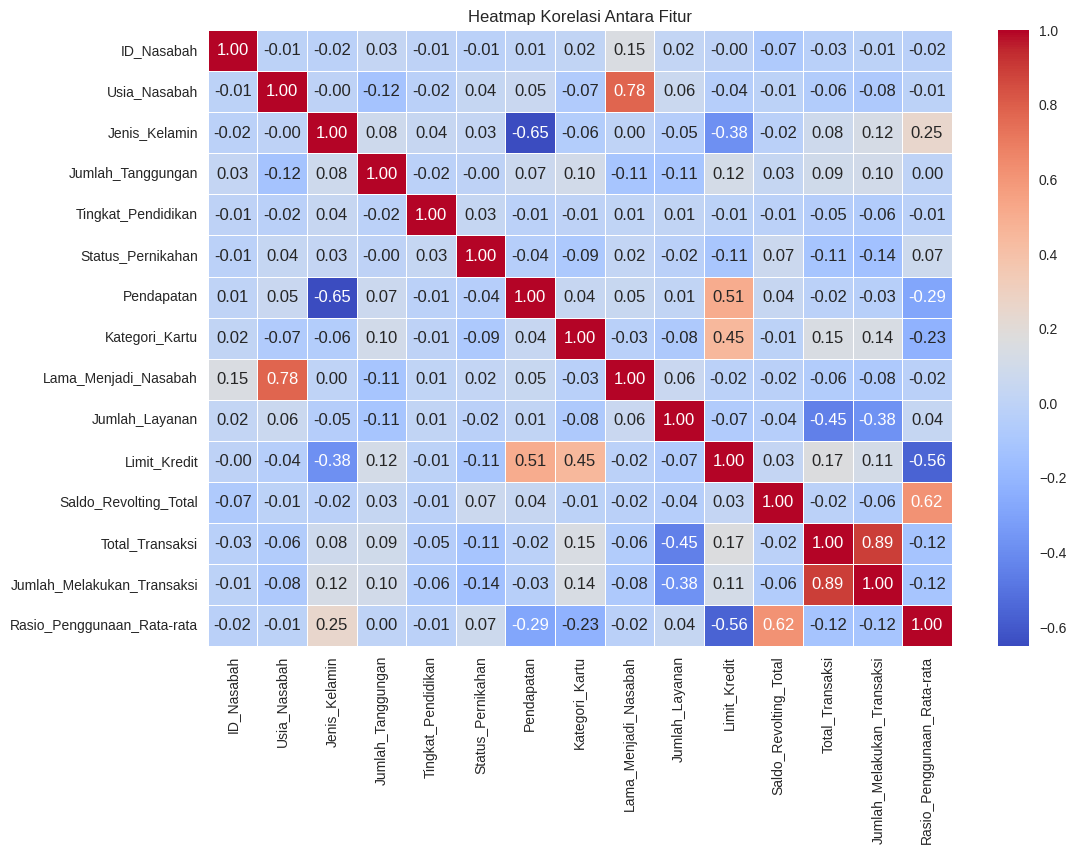

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(df_nasabah.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Heatmap Korelasi Antara Fitur')
plt.show()

In [ ]:
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt

# Menghapus kolom yang tidak diinginkan
columns_to_drop = ["Jumlah_Tanggungan", "Tingkat_Pendidikan", "Status_Pernikahan"]
df_nasabah_filtered = df_nasabah.drop(columns=columns_to_drop)

#PCA
pca = PCA(n_components=2)
pca.fit(df_nasabah_filtered)
PCA_ds = pd.DataFrame(pca.transform(df_nasabah_filtered), columns=(["col1","col2"]))
PCA_ds.describe().T


count          mean           std           min           25%  \
col1  1050.0 -1.668930e-08  3.804229e+07 -3.262105e+07 -2.720241e+07   
col2  1050.0 -8.315380e-14  6.938238e+03 -6.456612e+03 -5.129991e+03   

               50%           75%           max  
col1 -2.274235e+07  3.803344e+07  8.748635e+07  
col2 -3.048303e+03  3.331881e+03  1.604633e+04

<ipython-input-384-e517f74757ea>:4: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(PCA_ds["col1"], PCA_ds["col2"], s=50, cmap='viridis')


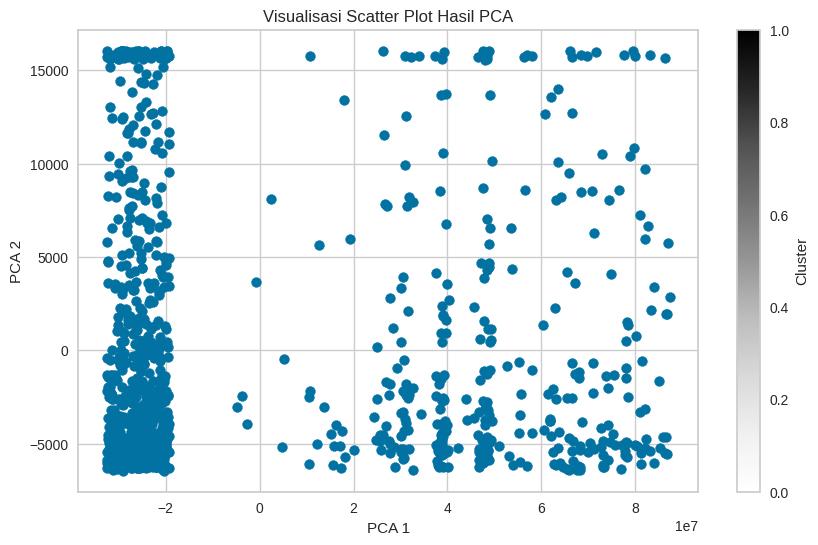

In [ ]:
#Visualisasi PCA

plt.figure(figsize=(10, 6))
plt.scatter(PCA_ds["col1"], PCA_ds["col2"], s=50, cmap='viridis')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('Visualisasi Scatter Plot Hasil PCA')
plt.colorbar(label='Cluster')
plt.show()

In [ ]:
PCA_ds

col1          col2
0    -2.317510e+07  -5513.955031
1     2.891225e+07  -6236.979647
2    -2.137240e+07   3175.214609
3     7.990730e+07  15786.875799
4    -3.091352e+07  -5760.024690
...            ...           ...
1045  2.764093e+07  -4853.924369
1046  6.724033e+07   3583.172163
1047 -2.972627e+07  -4726.320405
1048  8.603345e+07  -4636.861460
1049 -2.749877e+07  -4792.790676

[1050 rows x 2 columns]

## **Cluster**

### **K-Means**

In [ ]:
from sklearn.metrics import davies_bouldin_score, calinski_harabasz_score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

pca_data = PCA_ds.values

kmeansmodel = KMeans(n_clusters=2, init='k-means++', max_iter=500, n_init=10, random_state=42)
y_kmeans = kmeansmodel.fit_predict(pca_data)

# Mengukur seberapa mirip data dalam satu kluster dan seberapa berbeda dari kluster lain (nilai lebih tinggi lebih baik)
kmeans_silhouette = silhouette_score(pca_data, y_kmeans)

# Mengukur rata-rata rasio antara jarak intra-kluster dan jarak inter-kluster (nilai lebih rendah lebih baik)
kmeans_db = davies_bouldin_score(pca_data, y_kmeans)

# Mengukur rasio antara jumlah penyebaran data dalam kluster dan antar kluster (nilai lebih tinggi lebih baik)
kmeans_ch = calinski_harabasz_score(pca_data, y_kmeans)

print("Silhouette score:", kmeans_silhouette)
print("Davies-Bouldin score:", kmeans_db)
print("Calinski-Harabasz score:", kmeans_ch)


Silhouette score: 0.8529750494499876
Davies-Bouldin score: 0.25694722604611564
Calinski-Harabasz score: 10002.757260436942


In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

pca_data = PCA_ds.values

wcss = [] #Mengukur seberapa tersebar data dalam cluster
scores = []
for i in range(2, 10):
    km = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    km.fit(pca_data)
    wcss.append(km.inertia_)

    labels = km.labels_
    silhouette_avg = silhouette_score(pca_data, labels)
    scores.append(silhouette_avg)
    print('WCSS score for n_cluster = ' + str(i) + ' is ' + str(wcss[-1]))
    print('Silhouette score for n_clusters = ' + str(i) + ' is ' + str(silhouette_avg))


WCSS score for n_cluster = 2 is 1.4397198723854146e+17
Silhouette score for n_clusters = 2 is 0.8529750494499876
WCSS score for n_cluster = 3 is 4.757207960088848e+16
Silhouette score for n_clusters = 3 is 0.8300433446609741
WCSS score for n_cluster = 4 is 2.9032947295120684e+16
Silhouette score for n_clusters = 4 is 0.811296435660502
WCSS score for n_cluster = 5 is 2.1676450904461084e+16
Silhouette score for n_clusters = 5 is 0.5948953854045604
WCSS score for n_cluster = 6 is 1.5083715434428216e+16
Silhouette score for n_clusters = 6 is 0.588082229177359
WCSS score for n_cluster = 7 is 9802223516018314.0
Silhouette score for n_clusters = 7 is 0.6062132456867809
WCSS score for n_cluster = 8 is 7211520273821508.0
Silhouette score for n_clusters = 8 is 0.622928129672417
WCSS score for n_cluster = 9 is 5641861898205738.0
Silhouette score for n_clusters = 9 is 0.6213824654803052


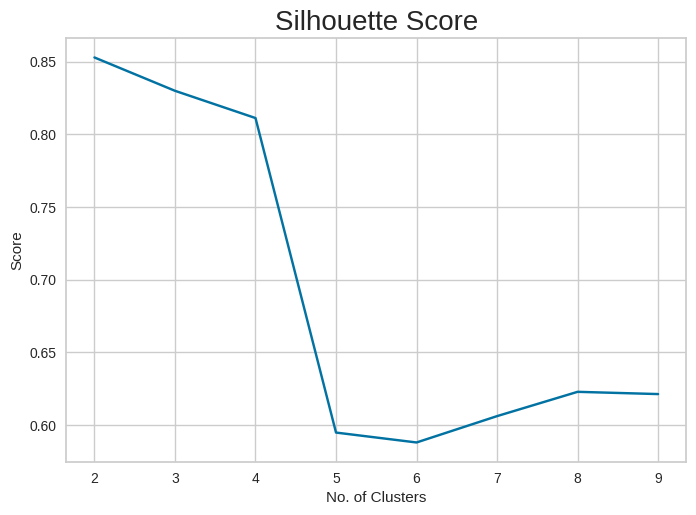

In [ ]:
# Visualizing Silhouette Score
plt.plot(range(2, 10), scores)
plt.title('Silhouette Score', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('Score')
plt.show()

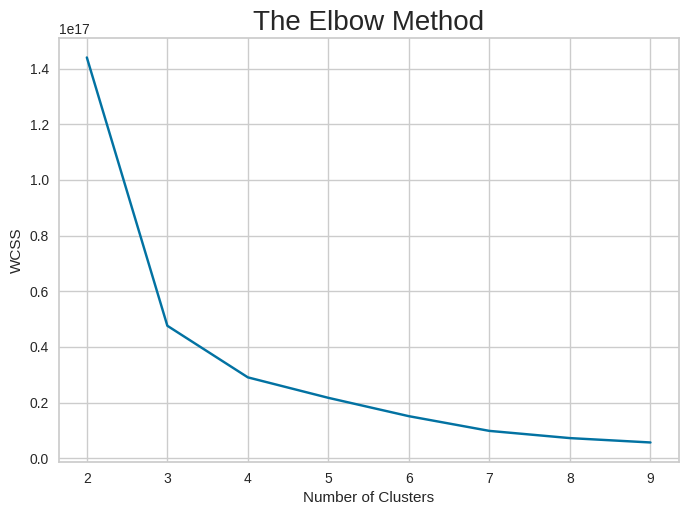

In [ ]:
# mencari jumlah cluster optmal

plt.plot(range(2, 10), wcss)
plt.title('The Elbow Method', fontsize=20)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

Elbow Method to determine the number of clusters to be formed:


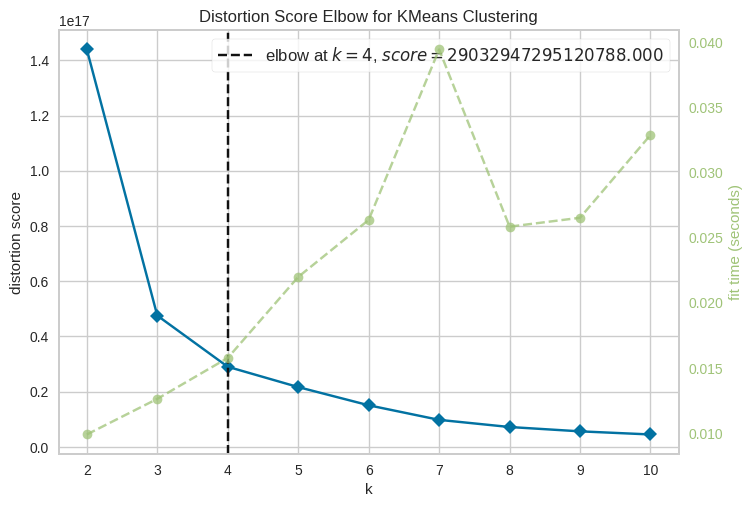

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
from yellowbrick.cluster import KElbowVisualizer

print("Elbow Method to determine the number of clusters to be formed:")
Elbow_M = KElbowVisualizer(kmeansmodel, k=10)
Elbow_M.fit(pca_data)
Elbow_M.show()


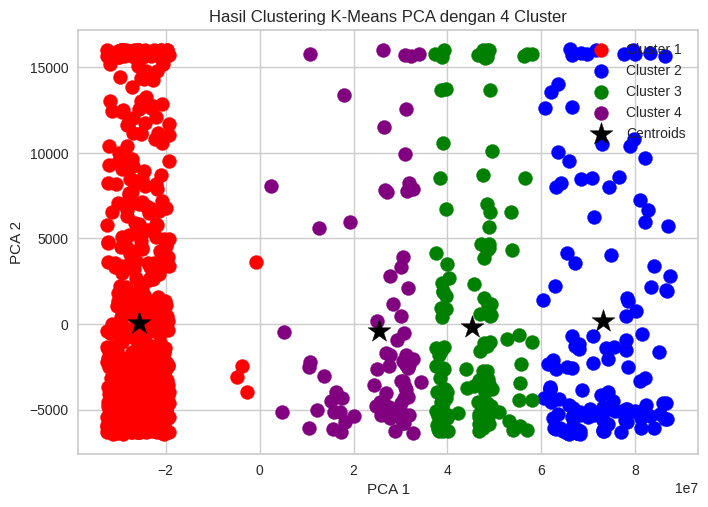

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

kmeansmodel = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=42)
y_kmeans = kmeansmodel.fit_predict(pca_data)

# Visualisasi clustering menggunakan scatter plot
plt.scatter(pca_data[y_kmeans == 0, 0], pca_data[y_kmeans == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(pca_data[y_kmeans == 1, 0], pca_data[y_kmeans == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(pca_data[y_kmeans == 2, 0], pca_data[y_kmeans == 2, 1], s=100, c='green', label='Cluster 3')
plt.scatter(pca_data[y_kmeans == 3, 0], pca_data[y_kmeans == 3, 1], s=100, c='purple', label='Cluster 4')

# Menampilkan pusat cluster
plt.scatter(kmeansmodel.cluster_centers_[:, 0], kmeansmodel.cluster_centers_[:, 1], s=300, c='black', label='Centroids', marker='*')
plt.title('Hasil Clustering K-Means PCA dengan 4 Cluster')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend()
plt.show()



## **Hierarchical Clustering**

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

linkage_col = ['ward', 'complete', 'average', 'single']
scores_all = [[] for _ in range(len(linkage_col))]

for j in range(len(linkage_col)):
    print('Linkage: ', linkage_col[j])
    scores = []
    for i in range(2, 10):
        AC = AgglomerativeClustering(n_clusters=i, linkage=linkage_col[j])
        AC.fit(pca_data)

        labels = AC.labels_
        silhouette_avg = silhouette_score(pca_data, labels)
        scores.append(silhouette_avg)
        print('Silhouette score for n_clusters = ' + str(i) + ' is ' + str(silhouette_avg))
    print("\n##########################\n")
    scores_all[j] = scores


Linkage:  ward
Silhouette score for n_clusters = 2 is 0.8464759150137695
Silhouette score for n_clusters = 3 is 0.8227000688183252
Silhouette score for n_clusters = 4 is 0.7931698070071616
Silhouette score for n_clusters = 5 is 0.7931292744539016
Silhouette score for n_clusters = 6 is 0.566375051508503
Silhouette score for n_clusters = 7 is 0.5637494633439729
Silhouette score for n_clusters = 8 is 0.578237621954559
Silhouette score for n_clusters = 9 is 0.6015177429313366

##########################

Linkage:  complete
Silhouette score for n_clusters = 2 is 0.853267405783817
Silhouette score for n_clusters = 3 is 0.8300741540970288
Silhouette score for n_clusters = 4 is 0.8098332607859027
Silhouette score for n_clusters = 5 is 0.7527153197000183
Silhouette score for n_clusters = 6 is 0.7422431819475436
Silhouette score for n_clusters = 7 is 0.7461431478222773
Silhouette score for n_clusters = 8 is 0.7267359534463133
Silhouette score for n_clusters = 9 is 0.7294349055193509

###########

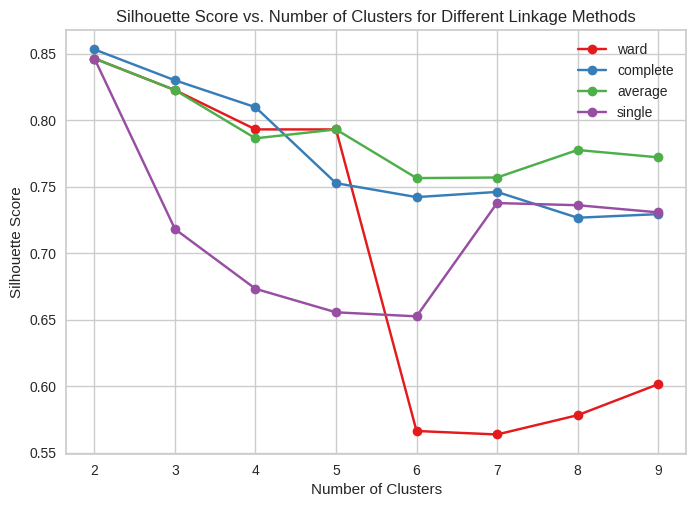

In [ ]:
import seaborn as sns

colors = sns.color_palette("Set1", len(linkage_col))

for j in range(len(linkage_col)):
    plt.plot(range(2, 10), scores_all[j], marker='o', color=colors[j], label=linkage_col[j])

plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Number of Clusters for Different Linkage Methods')
plt.legend()
plt.grid(True)
plt.show()


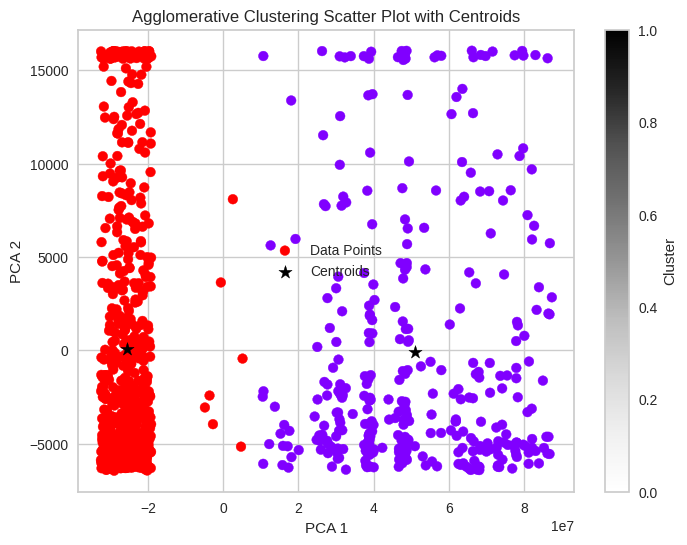

In [ ]:
n_cluster = 2
AC = AgglomerativeClustering(n_clusters=n_cluster, linkage='complete')
labels = AC.fit_predict(pca_data)

df_train_with_labels = np.column_stack((pca_data, labels))

centroids = []
for cluster_label in range(n_cluster):
    cluster_data = df_train_with_labels[df_train_with_labels[:, -1] == cluster_label]
    cluster_centroid = np.mean(cluster_data[:, :-1], axis=0)
    centroids.append(cluster_centroid)

centroids = np.array(centroids)

plt.figure(figsize=(8, 6))

x = pca_data[:, 0]
y = pca_data[:, 1]

plt.scatter(x, y, c=labels, cmap='rainbow', label='Data Points')
plt.scatter(centroids[:, 0], centroids[:, 1], c='black', marker='*', s=100, label='Centroids')

plt.title('Agglomerative Clustering Scatter Plot with Centroids')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.colorbar(label='Cluster')
plt.legend()
plt.show()


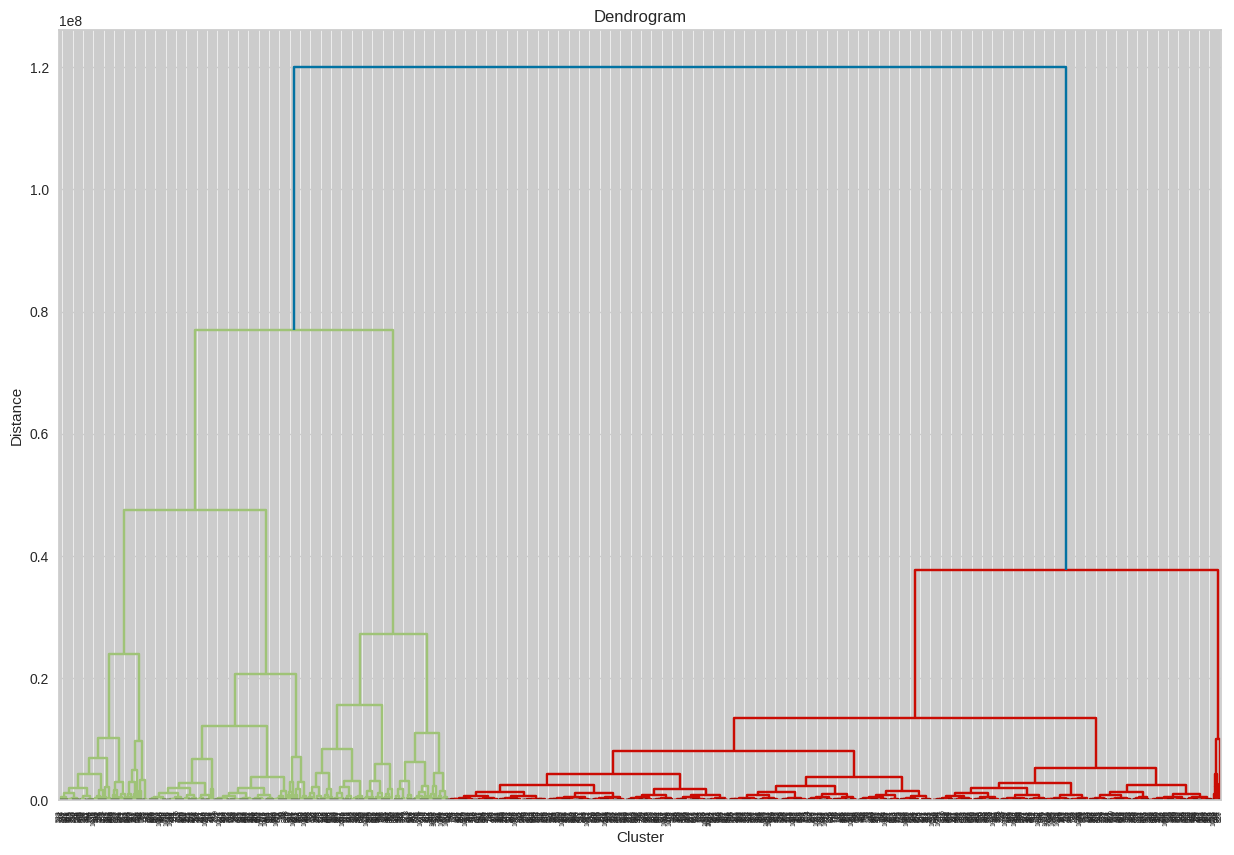

In [ ]:
import scipy.cluster.hierarchy as sch

linked = sch.linkage(pca_data, 'complete')
plt.figure(figsize=(15, 10))
dendrogram = sch.dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Dendrogram')
plt.xlabel('Cluster')
plt.ylabel('Distance')
plt.axhline(y=10, color='black', linestyle='--')
plt.show()


## **Silhouette coefficient**

In [ ]:
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score

# K-Means Clustering
silhouette_scores_kmeans = []
for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=300, n_init=10, random_state=42)
    y_kmeans = kmeans.fit_predict(pca_data)
    silhouette_score_kmeans = silhouette_score(pca_data, y_kmeans)
    silhouette_scores_kmeans.append((n_clusters, silhouette_score_kmeans))

best_kmeans = max(silhouette_scores_kmeans, key=lambda x: x[1])
print("Best Silhouette Score for K-Means Clustering:")
print(f"Number of Clusters: {best_kmeans[0]}, Silhouette Score: {best_kmeans[1]}")

# Hierarchical Clustering
linkage_col = ['ward', 'complete', 'average', 'single']
silhouette_scores_hierarchical = []
for linkage_method in linkage_col:
    silhouette_scores = []
    for n_clusters in range(2, 11):
        AC = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage_method)
        labels = AC.fit_predict(pca_data)
        silhouette_score_hierarchical = silhouette_score(pca_data, labels)
        silhouette_scores.append((n_clusters, silhouette_score_hierarchical))
    best_hierarchical = max(silhouette_scores, key=lambda x: x[1])
    silhouette_scores_hierarchical.append((linkage_method, best_hierarchical))

print("\nBest Silhouette Scores for Hierarchical Clustering:")
for linkage_method, best_score in silhouette_scores_hierarchical:
    print(f"Linkage Method: {linkage_method}, Number of Clusters: {best_score[0]}, Silhouette Score: {best_score[1]}")


Best Silhouette Score for K-Means Clustering:
Number of Clusters: 2, Silhouette Score: 0.8529750494499876

Best Silhouette Scores for Hierarchical Clustering:
Linkage Method: ward, Number of Clusters: 2, Silhouette Score: 0.8464759150137695
Linkage Method: complete, Number of Clusters: 2, Silhouette Score: 0.853267405783817
Linkage Method: average, Number of Clusters: 2, Silhouette Score: 0.8464759150137695
Linkage Method: single, Number of Clusters: 2, Silhouette Score: 0.8464759150137695


## **Interpretasi**

## **K -Means**

In [ ]:
# Inisialisasi model K-Means dengan jumlah cluster terpilih
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=42)

# Melakukan clustering pada data PCA
y_kmeans = kmeans.fit_predict(pca_data)

# Menambahkan kolom cluster ke DataFrame df_nasabah
df_nasabah['Cluster'] = y_kmeans
df_nasabah

ID_Nasabah  Usia_Nasabah  Jenis_Kelamin  Jumlah_Tanggungan  \
0      717574683      0.692308              1                  3   
1      769662033      0.487179              1                  2   
2      719377383      0.358974              0                  2   
3      820657083      0.692308              0                  4   
4      709836258      0.487179              1                  4   
...          ...           ...            ...                ...   
1045   768390708      0.538462              0                  2   
1046   807990108      0.461538              0                  1   
1047   711023508      0.743590              1                  1   
1048   826783233      0.794872              1                  3   
1049   713251008      0.435897              1                  2   

      Tingkat_Pendidikan  Status_Pernikahan  Pendapatan  Kategori_Kartu  \
0                      4                  2    0.300042               0   
1                      1                  2    0.066801               0   
2                      1                  0    0.440866               0   
3                      1                  0    0.798304               2   
4                      4                  2    0.145665               0   
...                  ...                ...         ...             ...   
1045                   4                  0    0.580703               0   
1046                   5                  1    0.976836               0   
1047                   4                  2    0.404287               0   
1048                   3                  0    0.169685               0   
1049                   5                  2    0.404287               0   

      Lama_Menjadi_Nasabah  Jumlah_Layanan  Limit_Kredit  \
0                     46.0               6        2192.0   
1                     29.0               2        1438.3   
2                     28.0               1       10880.0   
3                     48.0               5       23543.0   
4                     41.0               5        1927.0   
...                    ...             ...           ...   
1045                  41.0               6        2877.0   
1046                  39.0               3       11362.0   
1047                  43.0               5        3161.0   
1048                  53.0               1        3029.0   
1049                  38.0               6        2960.0   

      Saldo_Revolting_Total  Total_Transaksi  Jumlah_Melakukan_Transaksi  \
0                      1146           4756.0                        85.0   
1                         0           5025.0                        85.0   
2                      2025           4957.0                        90.0   
3                       800           3819.0                        72.0   
4                      1337           5127.0                        81.0   
...                     ...              ...                         ...   
1045                   1136           4006.0                        68.0   
1046                      0           3197.0                        61.0   
1047                   1389           1547.0                        30.0   
1048                   2214           4750.0                        89.0   
1049                   1853           3921.0                        63.0   

      Rasio_Penggunaan_Rata-rata  Cluster  
0                          0.523        0  
1                          0.000        3  
2                          0.186        0  
3                          0.023        1  
4                          0.694        0  
...                          ...      ...  
1045                       0.395        3  
1046                       0.000        1  
1047                       0.439        0  
1048                       0.731        1  
1049                       0.626        0  

[1050 rows x 16 columns]

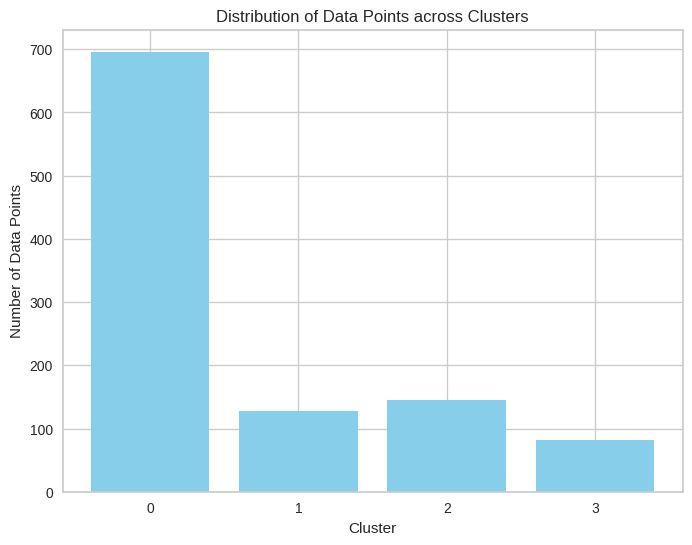

In [ ]:
import matplotlib.pyplot as plt

# Menghitung jumlah data di setiap klaster
cluster_counts = df_nasabah['Cluster'].value_counts().sort_index()

# Mendapatkan label klaster yang unik
unique_clusters = np.unique(df_nasabah['Cluster'])

# Plot bar plot
plt.figure(figsize=(8, 6))
plt.bar(unique_clusters, cluster_counts, color='skyblue')
plt.xlabel('Cluster')
plt.ylabel('Number of Data Points')
plt.title('Distribution of Data Points across Clusters')
plt.xticks(unique_clusters)
plt.show()


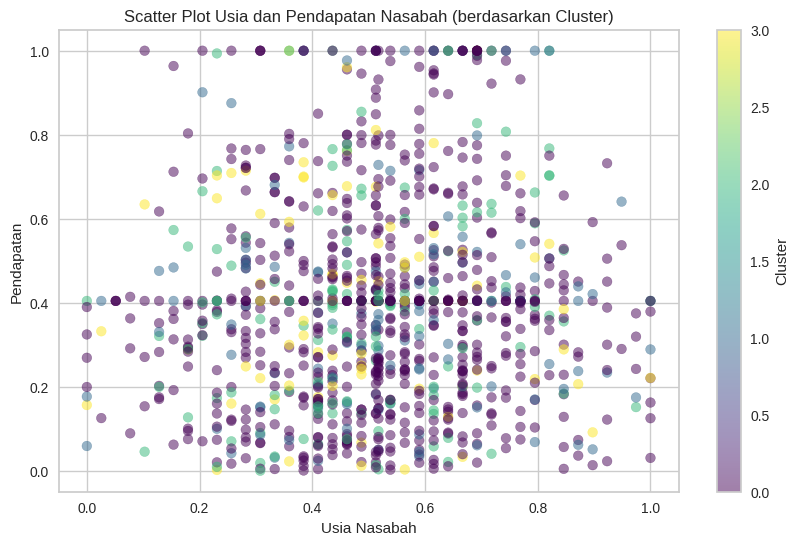

In [ ]:
import matplotlib.pyplot as plt

# Data
usia_nasabah = df_nasabah['Usia_Nasabah']
pendapatan = df_nasabah['Pendapatan']
clusters = df_nasabah['Cluster']

# Membuat scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(usia_nasabah, pendapatan, c=clusters, cmap='viridis', alpha=0.5)
plt.title('Scatter Plot Usia dan Pendapatan Nasabah (berdasarkan Cluster)')
plt.xlabel('Usia Nasabah')
plt.ylabel('Pendapatan')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()


Kesimpulan:
- nasabah yang memiliki pendapatan tinggi terdapat di usia  pertengahan   
- nasabah yang memiliki pendapatan stabil terdapat di semua usia  
- nasabah yang memiliki pendapatan rendah terdapat di semua usia   
- nasabah yang berada di usia tua dan muda cenderung memiliki pendapatan rendah ke stabil
- nasabah yang berada di usia pertengahan cenderung memiliki pendapatan rendah ke tinggi

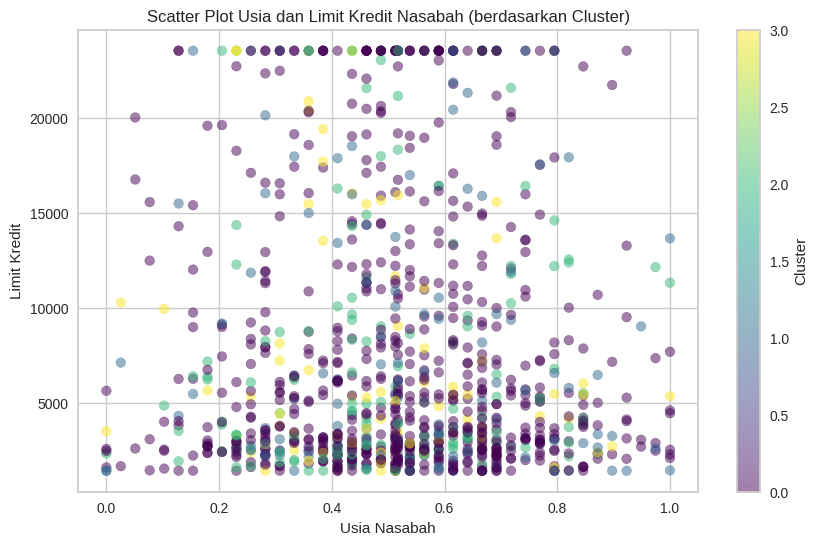

In [ ]:
import matplotlib.pyplot as plt

# Data
usia_nasabah = df_nasabah['Usia_Nasabah']
limit_kredit = df_nasabah['Limit_Kredit']
clusters = df_nasabah['Cluster']

# Membuat scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(usia_nasabah, limit_kredit, c=clusters, cmap='viridis', alpha=0.5)
plt.title('Scatter Plot Usia dan Limit Kredit Nasabah (berdasarkan Cluster)')
plt.xlabel('Usia Nasabah')
plt.ylabel('Limit Kredit')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()


Kesimpulan:
- nasabah dengan limit kredit tinggi (di atas 20.000)terdapat di usia pertengahan
- nasabah dengan limit kredit rendah (di bawah 5.000)terdapat di semua usia
- nasabah dengan limit kredit stabil (10.000 - 15.000) cenderung di usia pertengahan


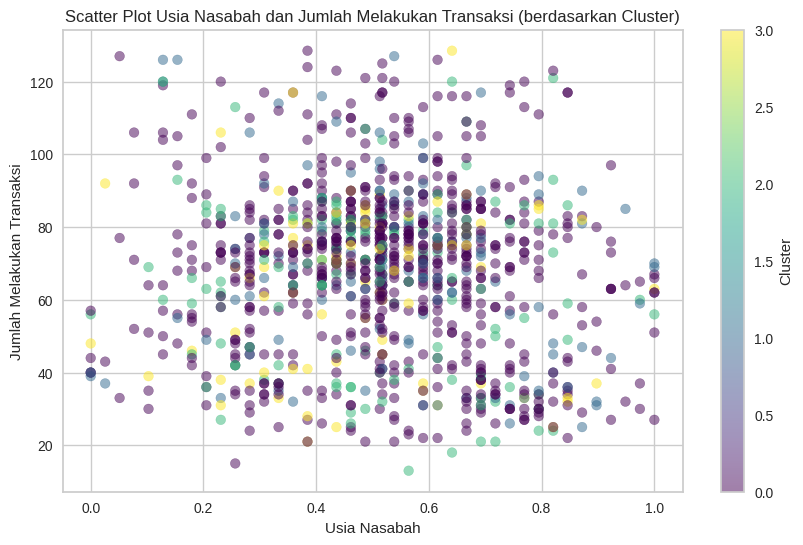

In [ ]:
import matplotlib.pyplot as plt

# Data
usia_nasabah = df_nasabah['Usia_Nasabah']
jumlah_transaksi = df_nasabah['Jumlah_Melakukan_Transaksi']
clusters = df_nasabah['Cluster']

# Membuat scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(usia_nasabah, jumlah_transaksi, c=clusters, cmap='viridis', alpha=0.5)
plt.title('Scatter Plot Usia Nasabah dan Jumlah Melakukan Transaksi (berdasarkan Cluster)')
plt.xlabel('Usia Nasabah')
plt.ylabel('Jumlah Melakukan Transaksi')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()


Kesimpulan:
- nasabah yang paling sering melakukan transaksi cenderung pada usia muda ke pertengaahan
- nasabah yang paling jarang melakukan transaksi cenderung pada usia pertengahan ke usia tua
- nasabah yang melakukan transaksi dengan stabil cenderung pada pertengaahan

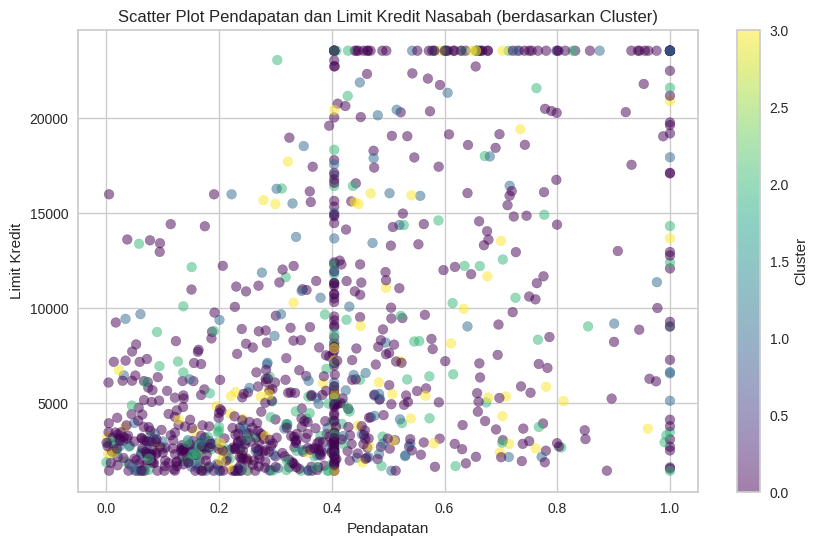

In [ ]:
import matplotlib.pyplot as plt

# Data
pendapatan = df_nasabah['Pendapatan']
limit_kredit = df_nasabah['Limit_Kredit']
clusters = df_nasabah['Cluster']

# Membuat scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(pendapatan, limit_kredit, c=clusters, cmap='viridis', alpha=0.5)
plt.title('Scatter Plot Pendapatan dan Limit Kredit Nasabah (berdasarkan Cluster)')
plt.xlabel('Pendapatan')
plt.ylabel('Limit Kredit')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()


Kesimpulan:
- nasabah dengan pendapatan tinggi memiliki limit kredit dari rendah ke tinggi
- nasabah dengan pendapatan stabil memiliki limit kredit dari rendah ke tinggi
- nasabah dengan pendapatan rendah memiliki limit kredit cenderung rendah ke stabil

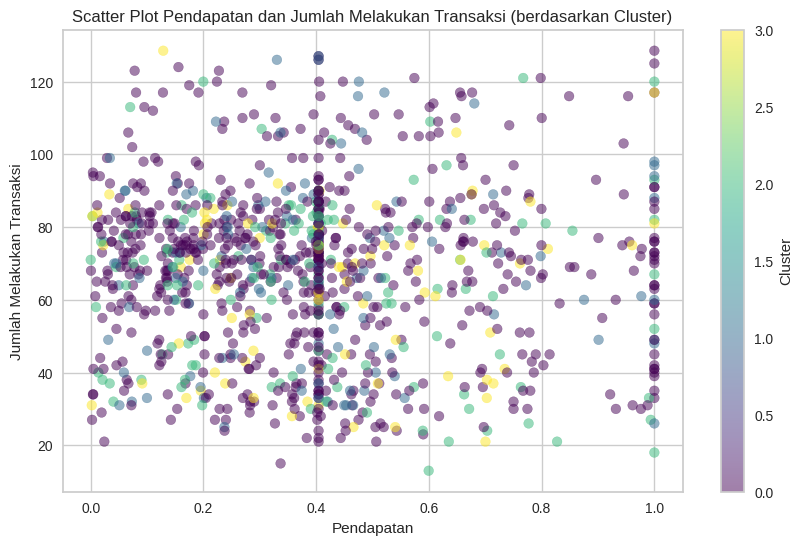

In [ ]:
import matplotlib.pyplot as plt

# Data
pendapatan = df_nasabah['Pendapatan']
jumlah_transaksi = df_nasabah['Jumlah_Melakukan_Transaksi']
clusters = df_nasabah['Cluster']

# Membuat scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(pendapatan, jumlah_transaksi, c=clusters, cmap='viridis', alpha=0.5)
plt.title('Scatter Plot Pendapatan dan Jumlah Melakukan Transaksi (berdasarkan Cluster)')
plt.xlabel('Pendapatan')
plt.ylabel('Jumlah Melakukan Transaksi')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()


Kesimpulan:
- nasabah dengan pendapatan tinggi melakukan transaksi dari jarang ke sering
- nasabah dengan pendapatan stabil melakukan transaksi dari jarang ke sering
- nasabah dengan pendapatan rendah melakukan transaksi dari jarang ke sering

## **Hierarchical Clustering**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.cluster import AgglomerativeClustering

# Inisialisasi model AgglomerativeClustering dengan jumlah cluster terpilih
n_cluster = 2
AC = AgglomerativeClustering(n_clusters=n_cluster, linkage='complete')

# Melakukan clustering pada data PCA
labels = AC.fit_predict(pca_data)

# Menambahkan kolom cluster ke DataFrame df_nasabah
df_nasabah['Cluster'] = labels
df_nasabah

ID_Nasabah  Usia_Nasabah  Jenis_Kelamin  Jumlah_Tanggungan  \
0      717574683      0.692308              1                  3   
1      769662033      0.487179              1                  2   
2      719377383      0.358974              0                  2   
3      820657083      0.692308              0                  4   
4      709836258      0.487179              1                  4   
...          ...           ...            ...                ...   
1045   768390708      0.538462              0                  2   
1046   807990108      0.461538              0                  1   
1047   711023508      0.743590              1                  1   
1048   826783233      0.794872              1                  3   
1049   713251008      0.435897              1                  2   

      Tingkat_Pendidikan  Status_Pernikahan  Pendapatan  Kategori_Kartu  \
0                      4                  2    0.300042               0   
1                      1                  2    0.066801               0   
2                      1                  0    0.440866               0   
3                      1                  0    0.798304               2   
4                      4                  2    0.145665               0   
...                  ...                ...         ...             ...   
1045                   4                  0    0.580703               0   
1046                   5                  1    0.976836               0   
1047                   4                  2    0.404287               0   
1048                   3                  0    0.169685               0   
1049                   5                  2    0.404287               0   

      Lama_Menjadi_Nasabah  Jumlah_Layanan  Limit_Kredit  \
0                     46.0               6        2192.0   
1                     29.0               2        1438.3   
2                     28.0               1       10880.0   
3                     48.0               5       23543.0   
4                     41.0               5        1927.0   
...                    ...             ...           ...   
1045                  41.0               6        2877.0   
1046                  39.0               3       11362.0   
1047                  43.0               5        3161.0   
1048                  53.0               1        3029.0   
1049                  38.0               6        2960.0   

      Saldo_Revolting_Total  Total_Transaksi  Jumlah_Melakukan_Transaksi  \
0                      1146           4756.0                        85.0   
1                         0           5025.0                        85.0   
2                      2025           4957.0                        90.0   
3                       800           3819.0                        72.0   
4                      1337           5127.0                        81.0   
...                     ...              ...                         ...   
1045                   1136           4006.0                        68.0   
1046                      0           3197.0                        61.0   
1047                   1389           1547.0                        30.0   
1048                   2214           4750.0                        89.0   
1049                   1853           3921.0                        63.0   

      Rasio_Penggunaan_Rata-rata  Cluster  
0                          0.523        1  
1                          0.000        0  
2                          0.186        1  
3                          0.023        0  
4                          0.694        1  
...                          ...      ...  
1045                       0.395        0  
1046                       0.000        0  
1047                       0.439        1  
1048                       0.731        0  
1049                       0.626        1  

[1050 rows x 16 columns]

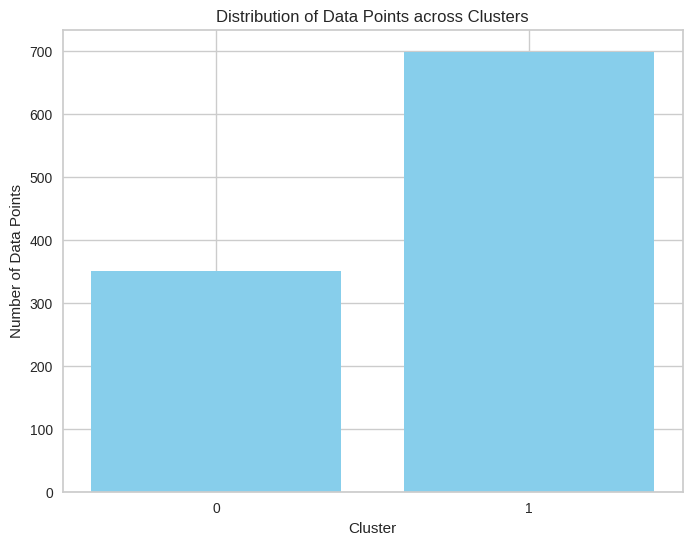

In [ ]:
import matplotlib.pyplot as plt

# Menghitung jumlah data di setiap klaster
cluster_counts = df_nasabah['Cluster'].value_counts().sort_index()

# Mendapatkan label klaster yang unik
unique_clusters = np.unique(df_nasabah['Cluster'])

# Plot bar plot
plt.figure(figsize=(8, 6))
plt.bar(unique_clusters, cluster_counts, color='skyblue')
plt.xlabel('Cluster')
plt.ylabel('Number of Data Points')
plt.title('Distribution of Data Points across Clusters')
plt.xticks(unique_clusters)
plt.show()

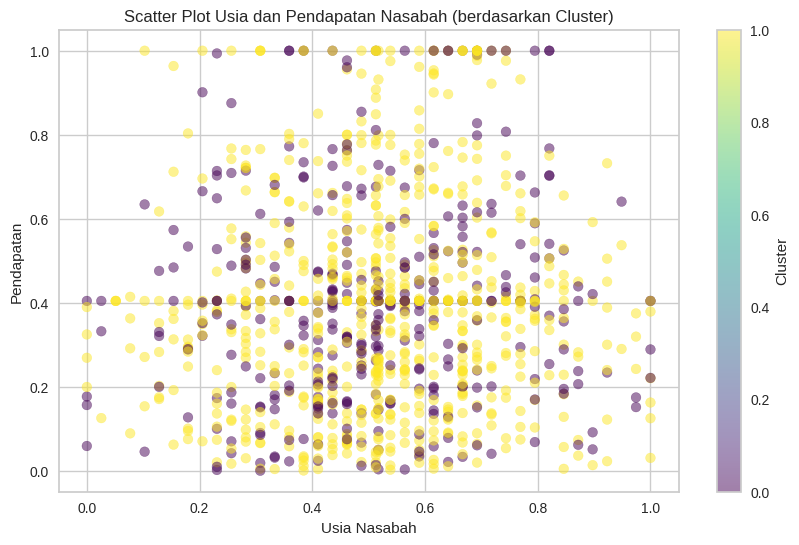

In [ ]:
import matplotlib.pyplot as plt

# Data
usia_nasabah = df_nasabah['Usia_Nasabah']
pendapatan = df_nasabah['Pendapatan']
clusters = df_nasabah['Cluster']

# Membuat scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(usia_nasabah, pendapatan, c=clusters, cmap='viridis', alpha=0.5)
plt.title('Scatter Plot Usia dan Pendapatan Nasabah (berdasarkan Cluster)')
plt.xlabel('Usia Nasabah')
plt.ylabel('Pendapatan')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()


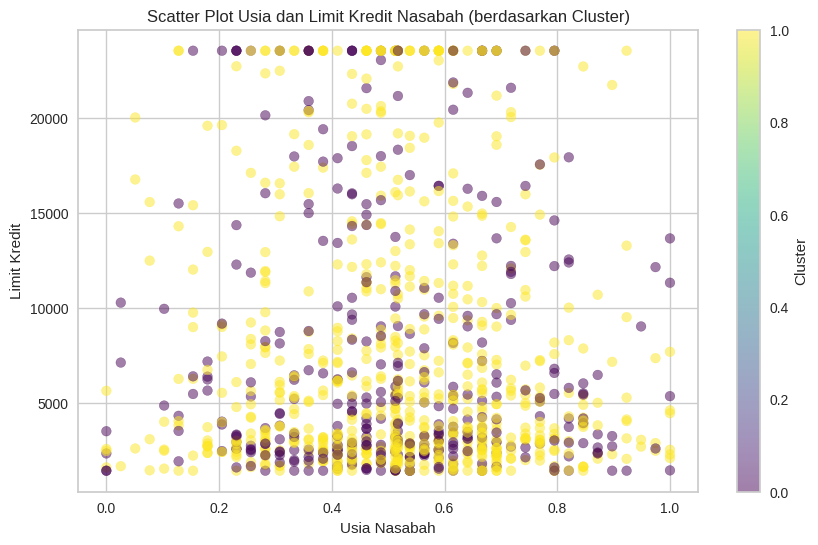

In [ ]:
import matplotlib.pyplot as plt

# Data
usia_nasabah = df_nasabah['Usia_Nasabah']
limit_kredit = df_nasabah['Limit_Kredit']
clusters = df_nasabah['Cluster']

# Membuat scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(usia_nasabah, limit_kredit, c=clusters, cmap='viridis', alpha=0.5)
plt.title('Scatter Plot Usia dan Limit Kredit Nasabah (berdasarkan Cluster)')
plt.xlabel('Usia Nasabah')
plt.ylabel('Limit Kredit')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()


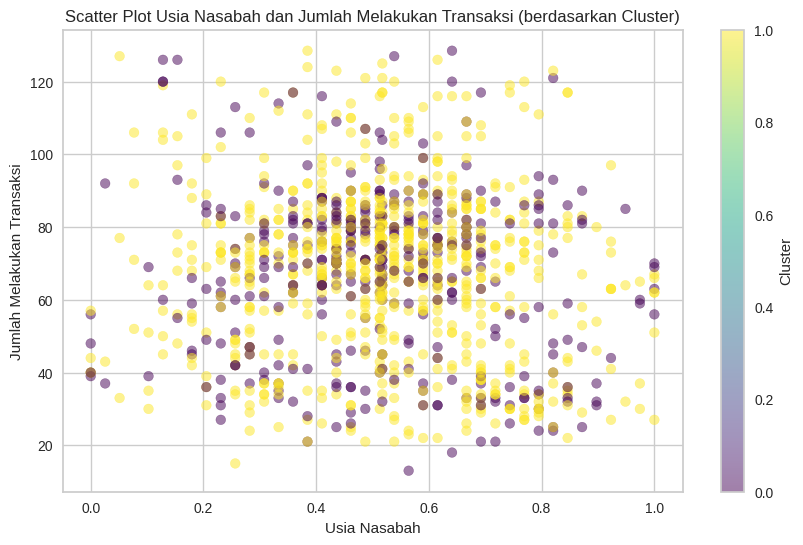

In [ ]:
import matplotlib.pyplot as plt

# Data
usia_nasabah = df_nasabah['Usia_Nasabah']
jumlah_transaksi = df_nasabah['Jumlah_Melakukan_Transaksi']
clusters = df_nasabah['Cluster']

# Membuat scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(usia_nasabah, jumlah_transaksi, c=clusters, cmap='viridis', alpha=0.5)
plt.title('Scatter Plot Usia Nasabah dan Jumlah Melakukan Transaksi (berdasarkan Cluster)')
plt.xlabel('Usia Nasabah')
plt.ylabel('Jumlah Melakukan Transaksi')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()


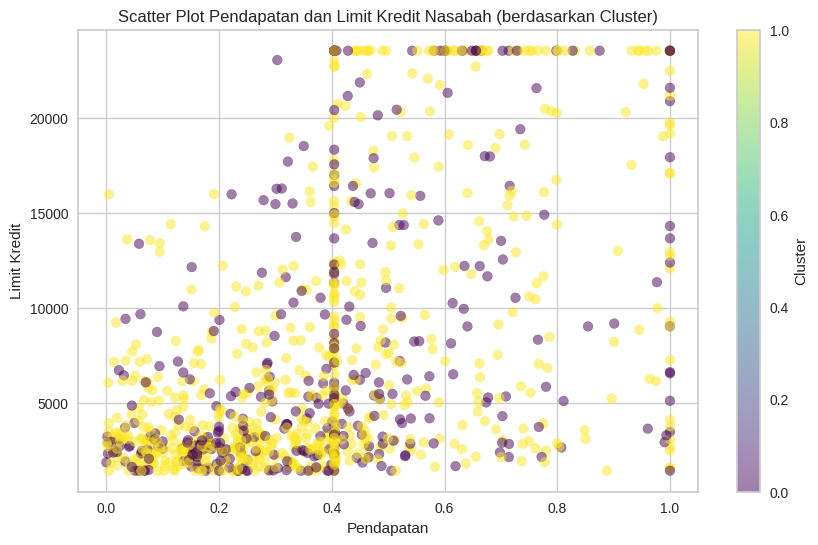

In [ ]:
import matplotlib.pyplot as plt

# Data
pendapatan = df_nasabah['Pendapatan']
limit_kredit = df_nasabah['Limit_Kredit']
clusters = df_nasabah['Cluster']

# Membuat scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(pendapatan, limit_kredit, c=clusters, cmap='viridis', alpha=0.5)
plt.title('Scatter Plot Pendapatan dan Limit Kredit Nasabah (berdasarkan Cluster)')
plt.xlabel('Pendapatan')
plt.ylabel('Limit Kredit')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()


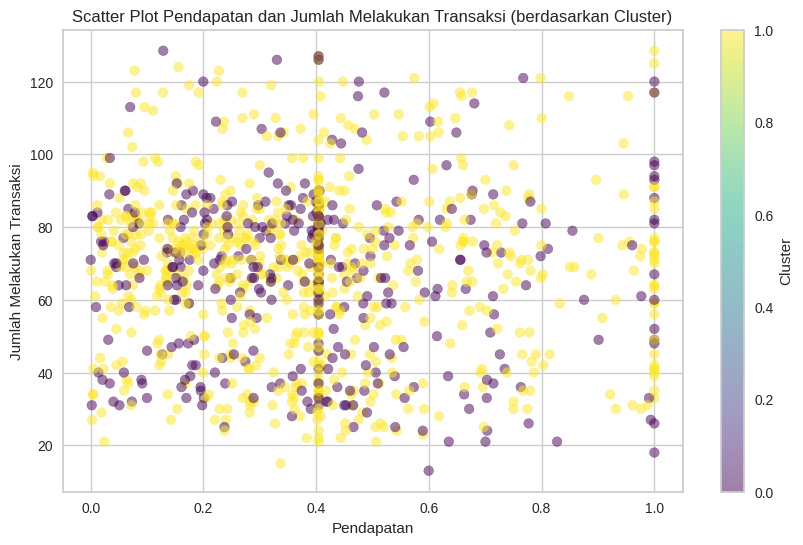

In [ ]:
import matplotlib.pyplot as plt

# Data
pendapatan = df_nasabah['Pendapatan']
jumlah_transaksi = df_nasabah['Jumlah_Melakukan_Transaksi']
clusters = df_nasabah['Cluster']

# Membuat scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(pendapatan, jumlah_transaksi, c=clusters, cmap='viridis', alpha=0.5)
plt.title('Scatter Plot Pendapatan dan Jumlah Melakukan Transaksi (berdasarkan Cluster)')
plt.xlabel('Pendapatan')
plt.ylabel('Jumlah Melakukan Transaksi')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()


## **Kesimpulan**

### Pendapatan dan Usia:

- Nasabah dengan pendapatan tinggi cenderung berada di usia pertengahan.
- Nasabah dengan pendapatan stabil atau rendah dapat ditemui di semua rentang usia.
- Nasabah dengan usia tua dan muda cenderung memiliki pendapatan rendah hingga stabil.
- Nasabah di usia pertengahan cenderung memiliki pendapatan rendah hingga tinggi.

### Limit Kredit dan Usia:

- Nasabah dengan limit kredit tinggi biasanya berada di usia pertengahan.
- Nasabah dengan limit kredit rendah dapat ditemui di semua rentang usia.
- Nasabah dengan limit kredit stabil (10.000 - 15.000) cenderung berada di usia pertengahan.

### Frekuensi Transaksi dan Usia:

- Nasabah yang paling sering melakukan transaksi biasanya berusia muda hingga pertengahan.
- Nasabah yang paling jarang melakukan transaksi biasanya berusia pertengahan hingga tua.
- Nasabah dengan frekuensi transaksi stabil cenderung berusia pertengahan.

### Hubungan antara Pendapatan, Limit Kredit, dan Transaksi:

- Nasabah dengan pendapatan tinggi atau stabil cenderung memiliki limit kredit dari rendah ke tinggi.
- Nasabah dengan pendapatan rendah cenderung memiliki limit kredit yang rendah hingga stabil.
- Nasabah dengan pendapatan stabil atau rendah cenderung melakukan transaksi dari jarang ke sering.